## Exploratory data analysis

We will start by displaying the files contained in the dataset and unzip them so as to be proper to be used in our notebook.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing as prepro
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('datareal (3).csv',sep=';')

In [4]:
df.shape

(500, 7)

In [5]:
df.head()

,Category,DayOfWeek,Dates,Address,PdDistrict,X,Y
0,Perkosaan,Monday,24/01/2022 21:00,Jagakarsa,Jagakarsa,106.825665,-6.336060
1,Pencurian Biasa,Monday,25/10/2021 23:30,Tebet,Tebet,106.847284,-6.210990
2,Penganiayaan Ringan,Tuesday,31/05/2022 12:00,Cempaka Putih,Cempaka Putih,106.862368,-6.184973
3,Penganiayaan Berat,Wednesday,01/06/2022 00:00,Bekasi Selatan,Bekasi Selatan,106.981248,-6.269581
4,Pencurian Biasa,Wednesday,25/05/2022 09:00,Pulogadung,Pulogadung,106.909072,-6.183233


Here we can see both files contain over one thousand instances and the testing set considers only 7 features which can be seen below: 

Below we can see the number of null values in our columns and the type of them, this step is important to perform early in order to set these columns to their proper type and do some basic cleaning.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    500 non-null    object 
 1   DayOfWeek   500 non-null    object 
 2   Dates       500 non-null    object 
 3   Address     500 non-null    object 
 4   PdDistrict  500 non-null    object 
 5   X           500 non-null    float64
 6   Y           500 non-null    float64
dtypes: float64(2), object(5)
memory usage: 27.5+ KB


There is not null values, they are all set properly excepting the Date column which has to be set as Datetime type, we will do this in the next lines:

In [7]:
df.isna().sum()

Category      0
DayOfWeek     0
Dates         0
Address       0
PdDistrict    0
X             0
Y             0
dtype: int64

As we have only 2 numeric columns (Longitude (X) and Latitude (Y)) the describe function will be performed only on these two:

In [8]:
df.describe()

,X,Y
count,500.000000,500.000000
mean,106.815206,-6.227508
std,0.104602,0.097491
min,106.408004,-6.695136
25%,106.776266,-6.262140
50%,106.813117,-6.208816
75%,106.863149,-6.161422
max,107.219697,-6.063489


In [9]:
df.shape

(500, 7)

Once we got rid of those instances in the describe table we can see the X and Y minimum and maximum are shortened which means they comprehend the region around Jabodetabek. Now we will set the Date feature to datetime type allowing us to perform time series analysis.

In [10]:
df['Dates'] =  pd.to_datetime(df['Dates'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Category    500 non-null    object        
 1   DayOfWeek   500 non-null    object        
 2   Dates       500 non-null    datetime64[ns]
 3   Address     500 non-null    object        
 4   PdDistrict  500 non-null    object        
 5   X           500 non-null    float64       
 6   Y           500 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 27.5+ KB


Another very important detail about the data is that it contains duplicated instances, we have to eliminate them in order to avoid unuseful/insignificant data:

In [11]:
len(df[df.duplicated()])

0

In [12]:
df.drop_duplicates(inplace=True)
len(df)

500

Once we have made a basic processing we can start exploring our label and features:

In [13]:
df.Category.unique()

array(['Perkosaan', 'Pencurian Biasa', 'Penganiayaan Ringan',
       'Penganiayaan Berat', 'Pencurian Dengan Kekerasan',
       'Pencurian Kendaraan Bermotor', 'Kerusuhan', 'Demonstrasi',
       'Narkotika', 'Pembunuhan', 'Pencurian Dengan Pemberatan',
       'Pelecehan Seksual', 'Pembakaran Dengan Sengaja', 'Penipuan',
       'Penadahan', 'Terorisme', 'Prostitusi', 'Pengrusakan',
       'Penculikan'], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


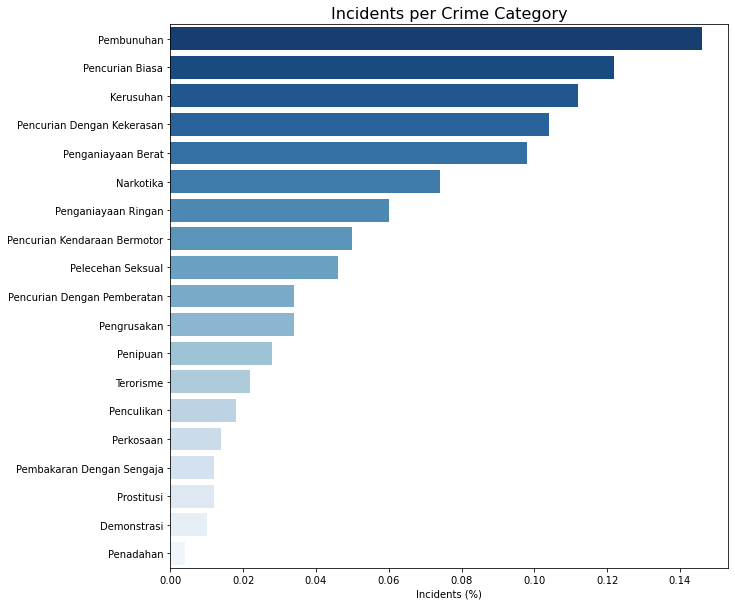

In [14]:
plt.figure(figsize=(10, 10))
sns.barplot(df.Category.value_counts(normalize=True), 
            df.Category.value_counts(normalize=True).index,
            orient='h', palette="Blues_r")
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

plt.show()

We can plot the distribution of the crime by category on the Jabodetabek region map, but firstly I will read the image obtained from Google maps:

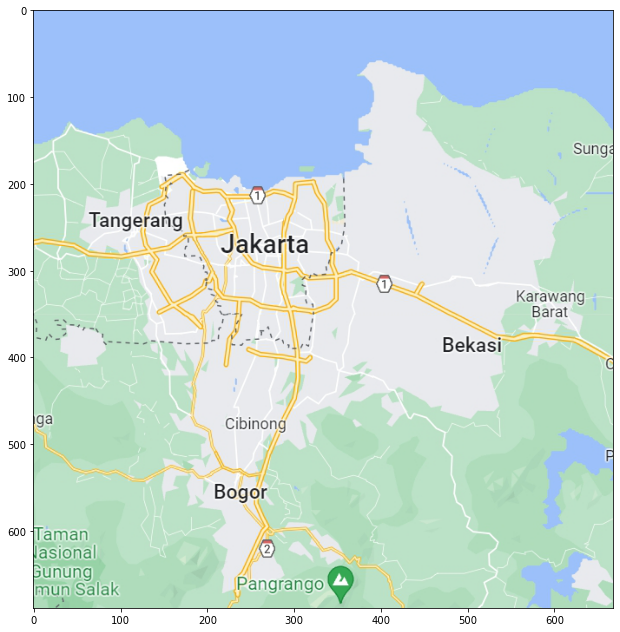

In [15]:
img_map = plt.imread('jabodetabek.jpg')
plt.subplots(figsize = (11,11))
plt.imshow(img_map)

In [16]:
#-6.075680502240227, -6.382534799708853
#106.67667707724776, 106.98259815504802

#-5.867995422984437,-6.761458415903886
#106.41063144676787, 107.39977067582953
BBox = (106.41063144676787, 107.39977067582953, -5.867995422984437,-6.761458415903886)

(106.41063144676787,
 107.39977067582953,
 -5.867995422984437,
 -6.761458415903886)

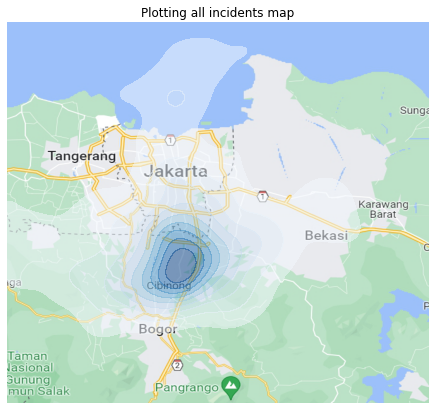

In [17]:
fig, ax = plt.subplots(figsize = (8,7))
sns.kdeplot(data=df.sample(500), x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5)
ax.set_title('Plotting all incidents map')
ax.set_xlim(106.41063144676787, 107.39977067582953)
ax.set_ylim(-5.867995422984437,-6.761458415903886)
ax.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
ax.axis('off')

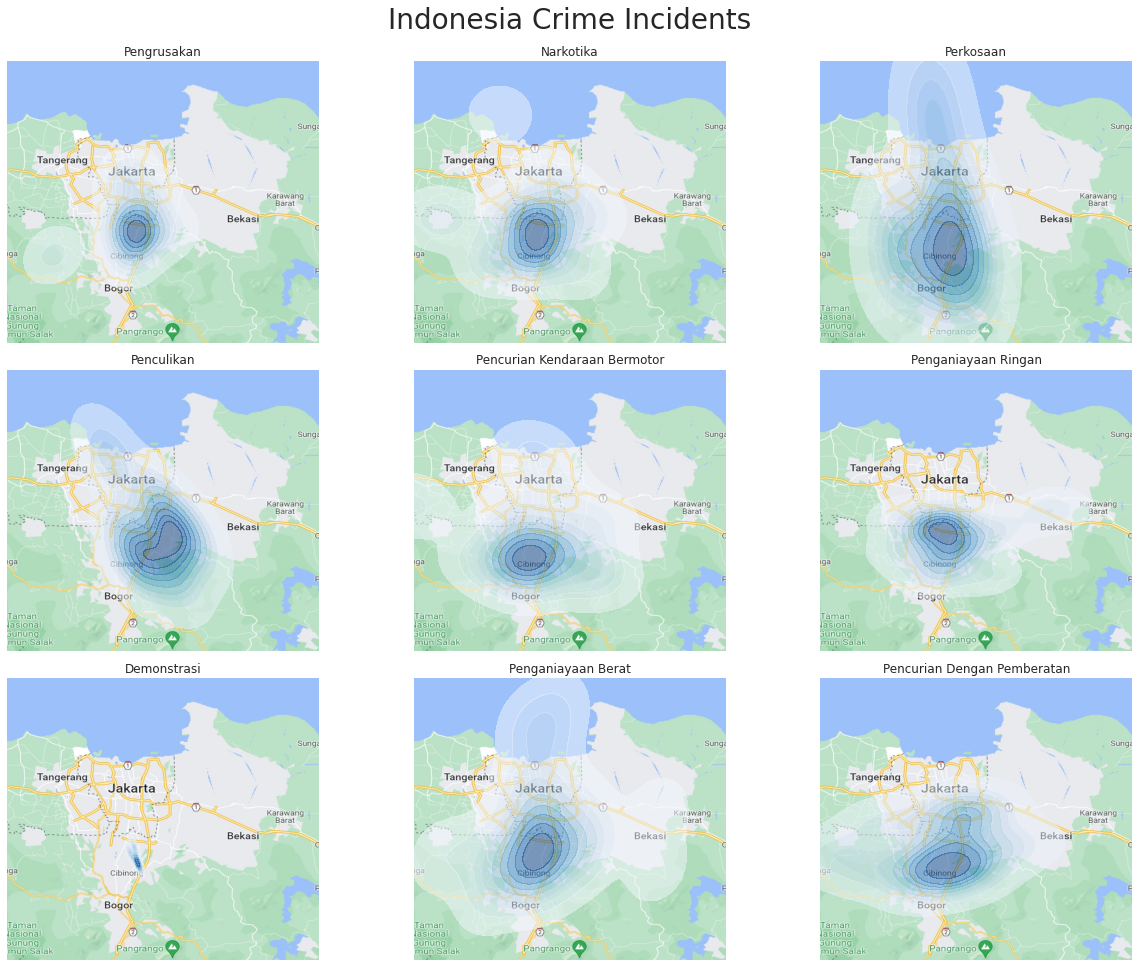

In [18]:
import pylab
import numpy as np

pylab.rcParams['figure.figsize'] = (18.0, 13.0)

PR = df[df['Category'] == 'Pengrusakan']
N = df[df['Category'] == 'Narkotika']
PK = df[df['Category'] == 'Perkosaan']
PC = df[df['Category'] == 'Penculikan']
PKB = df[df['Category'] == 'Pencurian Kendaraan Bermotor']
PNR = df[df['Category'] == 'Penganiayaan Ringan']
D = df[df['Category'] == 'Demonstrasi']
PB = df[df['Category'] == 'Penganiayaan Berat']
PDP = df[df['Category'] == 'Pencurian Dengan Pemberatan']
PDKR = df[df['Category'] == 'Pencurian Dengan Kekerasan']
PD = df[df['Category'] == 'Penadahan']
PBL = df[df['Category'] == 'Pencurian Biasa']
PDS = df[df['Category'] == 'Pembakaran Dengan Sengaja']
PMB = df[df['Category'] == 'Pembunuhan']
PP = df[df['Category'] == 'Penipuan']
KR = df[df['Category'] == 'Kerusuhan']
PS = df[df['Category'] == 'Pelecehan Seksual']
TR = df[df['Category'] == 'Terorisme']
PRS = df[df['Category'] == 'Prostitusi']

with plt.style.context('seaborn-darkgrid'):
    ax1 = plt.subplot2grid((3,3), (0, 0))
    ax1.set_title('Pengrusakan')
    ax1.set_xlim(106.41063144676787, 107.39977067582953)
    ax1.set_ylim(-5.867995422984437,-6.761458415903886)
    ax1.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PR, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax1)
    ax1.axis('off')

    ax2 = plt.subplot2grid((3,3), (0, 1))
    ax2.set_title('Narkotika')
    ax2.set_xlim(106.41063144676787, 107.39977067582953)
    ax2.set_ylim(-5.867995422984437,-6.761458415903886)
    ax2.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=N, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax2)
    ax2.axis('off')
    
    ax3 = plt.subplot2grid((3,3), (0, 2))
    ax3.set_title('Perkosaan')
    ax3.set_xlim(106.41063144676787, 107.39977067582953)
    ax3.set_ylim(-5.867995422984437,-6.761458415903886)
    ax3.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PK, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax3)
    ax3.axis('off')
    
    ax4 = plt.subplot2grid((3,3), (1, 0))
    ax4.set_title('Penculikan')
    ax4.set_xlim(106.41063144676787, 107.39977067582953)
    ax4.set_ylim(-5.867995422984437,-6.761458415903886)
    ax4.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PC, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax4)
    ax4.axis('off')
    
    ax5 = plt.subplot2grid((3,3), (1, 1))
    ax5.set_title('Pencurian Kendaraan Bermotor')
    ax5.set_xlim(106.41063144676787, 107.39977067582953)
    ax5.set_ylim(-5.867995422984437,-6.761458415903886)
    ax5.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PKB, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax5)
    ax5.axis('off')
    
    ax6 = plt.subplot2grid((3,3), (1, 2))
    ax6.set_title('Penganiayaan Ringan')
    ax6.set_xlim(106.41063144676787, 107.39977067582953)
    ax6.set_ylim(-5.867995422984437,-6.761458415903886)
    ax6.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PNR, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax6)
    ax6.axis('off')
    
    ax7 = plt.subplot2grid((3,3), (2, 0))
    ax7.set_title('Demonstrasi')
    ax7.set_xlim(106.41063144676787, 107.39977067582953)
    ax7.set_ylim(-5.867995422984437,-6.761458415903886)
    ax7.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=D, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax7)
    ax7.axis('off')
    
    ax8 = plt.subplot2grid((3,3), (2, 1))
    ax8.set_title('Penganiayaan Berat')
    ax8.set_xlim(106.41063144676787, 107.39977067582953)
    ax8.set_ylim(-5.867995422984437,-6.761458415903886)
    ax8.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PB, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax8)
    ax8.axis('off')
    
    ax9 = plt.subplot2grid((3,3), (2, 2))
    ax9.set_title('Pencurian Dengan Pemberatan')
    ax9.set_xlim(106.41063144676787, 107.39977067582953)
    ax9.set_ylim(-5.867995422984437,-6.761458415903886)
    ax9.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PDP, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax9)
    ax9.axis('off')
    
    pylab.gcf().text(0.5, 1.03, 
                    'Indonesia Crime Incidents',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout()
plt.show()

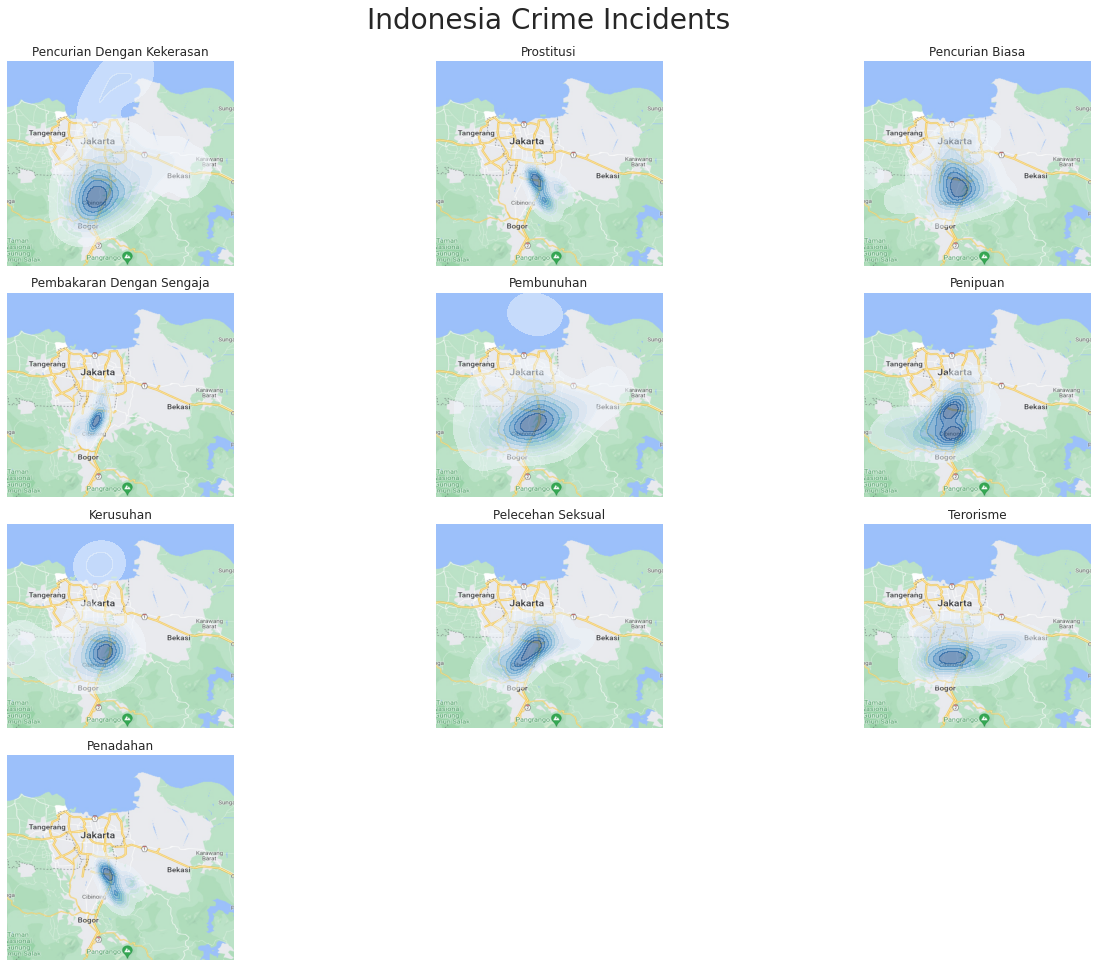

In [19]:
import pylab
import numpy as np

pylab.rcParams['figure.figsize'] = (18.0, 13.0)

PR = df[df['Category'] == 'Pengrusakan']
N = df[df['Category'] == 'Narkotika']
PK = df[df['Category'] == 'Perkosaan']
PC = df[df['Category'] == 'Penculikan']
PKB = df[df['Category'] == 'Pencurian Kendaraan Bermotor']
PNR = df[df['Category'] == 'Penganiayaan Ringan']
D = df[df['Category'] == 'Demonstrasi']
PB = df[df['Category'] == 'Penganiayaan Berat']
PDP = df[df['Category'] == 'Pencurian Dengan Pemberatan']
PDKR = df[df['Category'] == 'Pencurian Dengan Kekerasan']
PD = df[df['Category'] == 'Penadahan']
PBL = df[df['Category'] == 'Pencurian Biasa']
PDS = df[df['Category'] == 'Pembakaran Dengan Sengaja']
PMB = df[df['Category'] == 'Pembunuhan']
PP = df[df['Category'] == 'Penipuan']
KR = df[df['Category'] == 'Kerusuhan']
PS = df[df['Category'] == 'Pelecehan Seksual']
TR = df[df['Category'] == 'Terorisme']
PRS = df[df['Category'] == 'Prostitusi']

with plt.style.context('seaborn-darkgrid'):
    ax10 = plt.subplot2grid((4,3), (0, 0))
    ax10.set_title('Pencurian Dengan Kekerasan')
    ax10.set_xlim(106.41063144676787, 107.39977067582953)
    ax10.set_ylim(-5.867995422984437,-6.761458415903886)
    ax10.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PDKR, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax10)
    ax10.axis('off')
                  
    ax11 = plt.subplot2grid((4,3), (0, 1))
    ax11.set_title('Prostitusi')
    ax11.set_xlim(106.41063144676787, 107.39977067582953)
    ax11.set_ylim(-5.867995422984437,-6.761458415903886)
    ax11.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PRS, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax11)
    ax11.axis('off')

    ax12 = plt.subplot2grid((4,3), (0, 2))
    ax12.set_title('Pencurian Biasa')
    ax12.set_xlim(106.41063144676787, 107.39977067582953)
    ax12.set_ylim(-5.867995422984437,-6.761458415903886)
    ax12.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PBL, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax12)
    ax12.axis('off')

    ax13 = plt.subplot2grid((4,3), (1, 0))
    ax13.set_title('Pembakaran Dengan Sengaja')
    ax13.set_xlim(106.41063144676787, 107.39977067582953)
    ax13.set_ylim(-5.867995422984437,-6.761458415903886)
    ax13.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PDS, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax13)
    ax13.axis('off')
  
    ax14 = plt.subplot2grid((4,3), (1, 1))
    ax14.set_title('Pembunuhan')
    ax14.set_xlim(106.41063144676787, 107.39977067582953)
    ax14.set_ylim(-5.867995422984437,-6.761458415903886)
    ax14.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PMB, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax14)
    ax14.axis('off')
                  
    ax15 = plt.subplot2grid((4,3), (1, 2))
    ax15.set_title('Penipuan')
    ax15.set_xlim(106.41063144676787, 107.39977067582953)
    ax15.set_ylim(-5.867995422984437,-6.761458415903886)
    ax15.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PP, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax15)
    ax15.axis('off')
    
    ax16 = plt.subplot2grid((4,3), (2, 0))
    ax16.set_title('Kerusuhan')
    ax16.set_xlim(106.41063144676787, 107.39977067582953)
    ax16.set_ylim(-5.867995422984437,-6.761458415903886)
    ax16.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=KR, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax16)
    ax16.axis('off')
                  
    ax17 = plt.subplot2grid((4,3), (2, 1))
    ax17.set_title('Pelecehan Seksual')
    ax17.set_xlim(106.41063144676787, 107.39977067582953)
    ax17.set_ylim(-5.867995422984437,-6.761458415903886)
    ax17.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PS, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax17)
    ax17.axis('off')
    
    ax18= plt.subplot2grid((4,3), (2, 2))
    ax18.set_title('Terorisme')
    ax18.set_xlim(106.41063144676787, 107.39977067582953)
    ax18.set_ylim(-5.867995422984437,-6.761458415903886)
    ax18.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=TR, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax18)
    ax18.axis('off')
    
    ax19= plt.subplot2grid((4,3), (3, 0))
    ax19.set_title('Penadahan')
    ax19.set_xlim(106.41063144676787, 107.39977067582953)
    ax19.set_ylim(-5.867995422984437,-6.761458415903886)
    ax19.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
    sns.kdeplot(data=PRS, x='X', y='Y', fill=True, thresh=0.02, cmap='Blues', alpha=0.5, ax=ax19)
    ax19.axis('off')
        
    pylab.gcf().text(0.5, 1.03, 
                    'Indonesia Crime Incidents',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout()
plt.show()
    

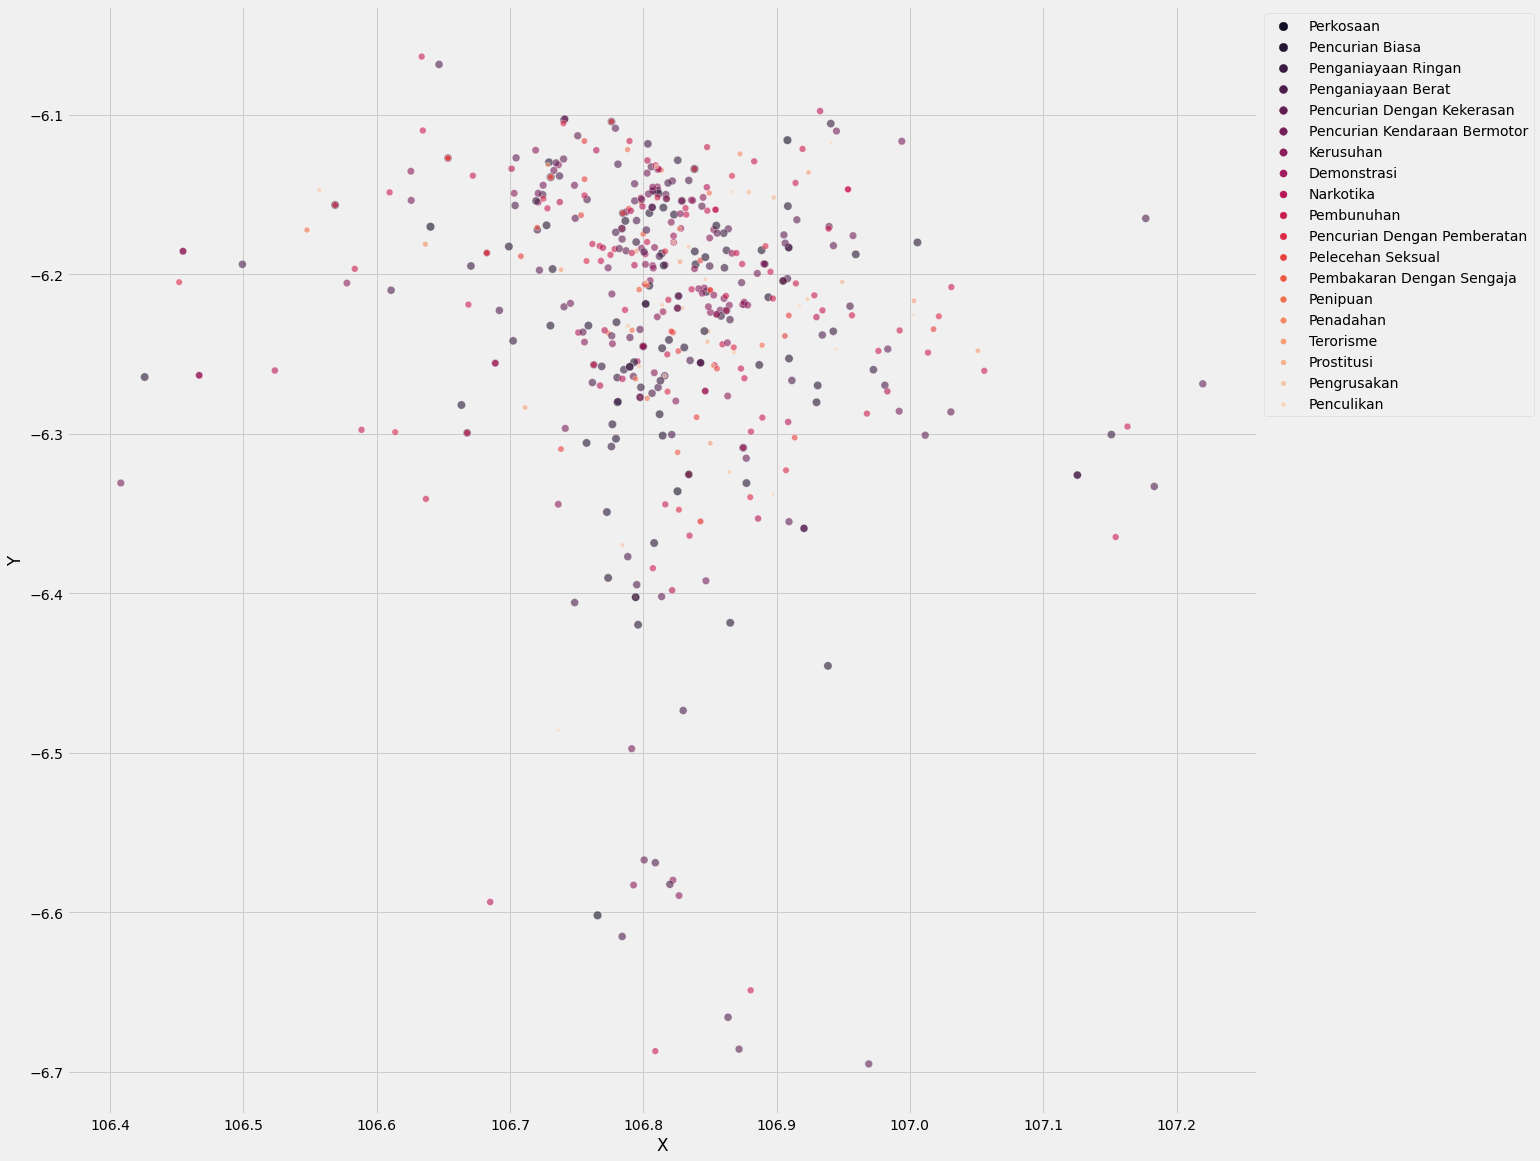

In [20]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(19, 19))
    sns.scatterplot(data=df, x='X', y='Y', alpha=0.6, palette='rocket', hue='Category', size='Category') # 878049 
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

Let's print the amount of unique descriptions in our dataset:

In [21]:
df.DayOfWeek.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday', 'Friday',
       'Saturday'], dtype=object)

In [22]:
df.PdDistrict.unique()

array(['Jagakarsa', 'Tebet', 'Cempaka Putih', 'Bekasi Selatan',
       'Pulogadung', 'Cikarang Selatan', 'Cikarang Timur', 'Cilincing',
       'Kembangan', 'Grogol Petamburan', 'Tanah Abang', 'Sawah Besar',
       'Cibinong', 'Gambir', 'Senen', 'Palmerah', 'Cibodas', 'Cilandak',
       'Cengkareng', 'Solear', 'Kemayoran', 'Tarumajaya', 'Balaraja',
       'Tambora', 'Tanjung Priok', 'Tajur Alam', 'Cipondoh',
       'Cikarang Utara', 'Ciracas', 'Pademangan', 'Pondok Gede',
       'Klapanunggal', 'Ciliwung', 'Ciomas', 'Kebagusan Raya', 'Legok',
       'Curug', 'Pasar Kemis', 'Larangan', 'Ciawi', 'Tigaraksa',
       'Bekasi Barat', 'Sukasari', 'Serpong', 'Mampang Prapatan',
       'Tanah Sareal', 'Ciputat Timur', 'Kebayoran Baru', 'Teluknaga',
       'Pamulang', 'Ciledug', 'Neglasari', 'Cisoka', 'Pagedangan',
       'Pinang', 'Senayan', 'Tangerang Selatan', 'Kosambi', 'Tangerang',
       'Jatiuwung', 'Pancoran', 'Kuningan', 'Kuningan Barat',
       'Kebayoran Lama', 'Pasar Minggu', 'Pesang

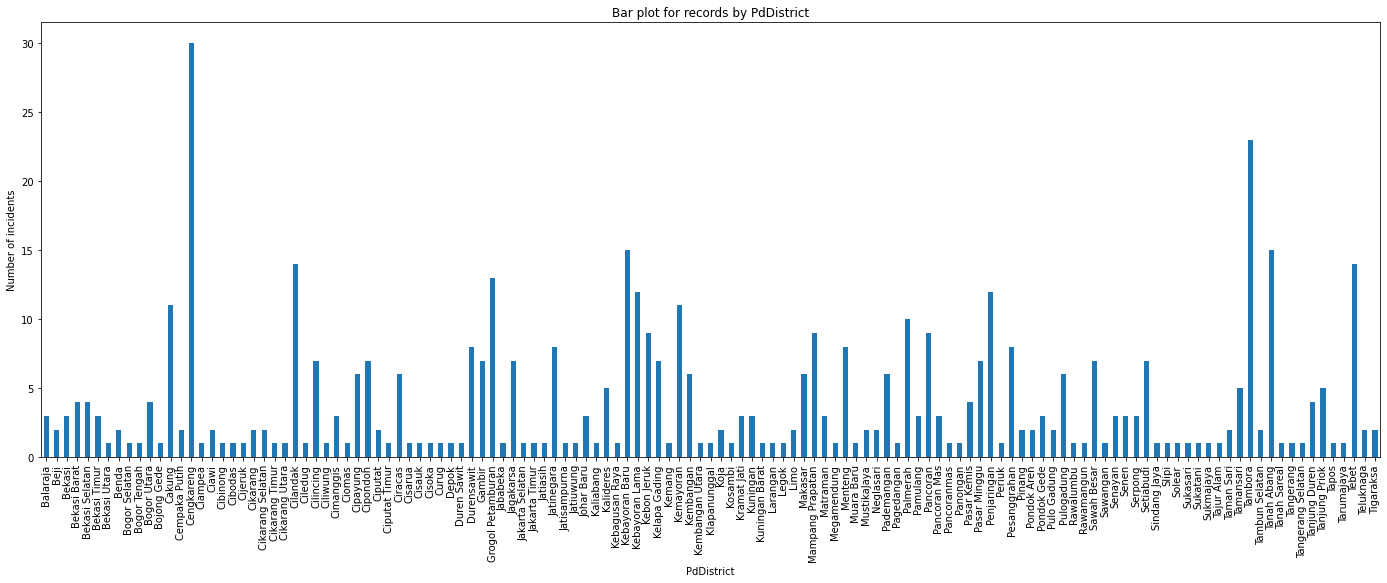

In [23]:
plt.figure(figsize=(24, 8))

df_pd=df.groupby(by='PdDistrict').count()
df_pd.iloc[:,0].plot(kind='bar')
plt.title('Bar plot for records by PdDistrict')
plt.xlabel("PdDistrict")
plt.ylabel("Number of incidents")
plt.show()

In [24]:
len(df.Address.unique())

129

In [25]:
df['year'] = pd.to_datetime(df['Dates']).dt.year
df['month'] = pd.to_datetime(df['Dates']).dt.month
df['day'] = pd.to_datetime(df['Dates']).dt.day
df['hour'] = pd.to_datetime(df['Dates']).dt.hour
df.sample(10)

,Category,DayOfWeek,Dates,Address,PdDistrict,X,Y,year,month,day,hour
338,Terorisme,Thursday,2020-05-07 15:00:00,Menteng,Menteng,106.827563,-6.192129,2020,5,7,15
291,Pencurian Dengan Kekerasan,Friday,2021-10-22 03:00:00,Kemayoran,Kemayoran,106.843948,-6.157300,2021,10,22,3
248,Penganiayaan Berat,Friday,2021-12-10 02:00:00,Taman Sari,Taman Sari,106.779280,-6.173673,2021,12,10,2
231,Penganiayaan Ringan,Wednesday,2019-12-18 15:10:00,Tebet,Tebet,106.858293,-6.226112,2019,12,18,15
146,Terorisme,Saturday,2020-12-26 19:38:00,Cengkareng,Cengkareng,106.728228,-6.131335,2020,12,26,19
145,Penculikan,Tuesday,2019-07-09 13:00:00,Tambora,Tambora,106.809726,-6.153292,2019,7,9,13
302,Terorisme,Monday,2021-11-08 11:00:00,Tanjung Duren,Tanjung Duren,106.783918,-6.171352,2021,11,8,11
16,Penganiayaan Berat,Tuesday,2021-11-02 07:51:00,Cibodas,Cibodas,106.610771,-6.210000,2021,11,2,7
222,Pembunuhan,Saturday,2019-11-16 22:00:00,Cengkareng,Cengkareng,106.728058,-6.158642,2019,11,16,22
265,Penganiayaan Berat,Saturday,2021-07-10 22:00:00,Jagakarsa,Jagakarsa,106.834110,-6.325503,2021,7,10,22


**Crime ocurrence by hour**

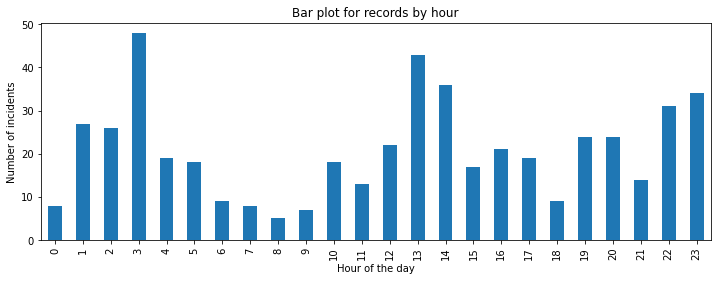

In [26]:
plt.figure(figsize=(12, 4))

hours_event=df.groupby(by='hour').count()
hours_event.iloc[:,0].plot(kind='bar')
plt.title('Bar plot for records by hour')
plt.xlabel("Hour of the day")
plt.ylabel("Number of incidents")
plt.show()

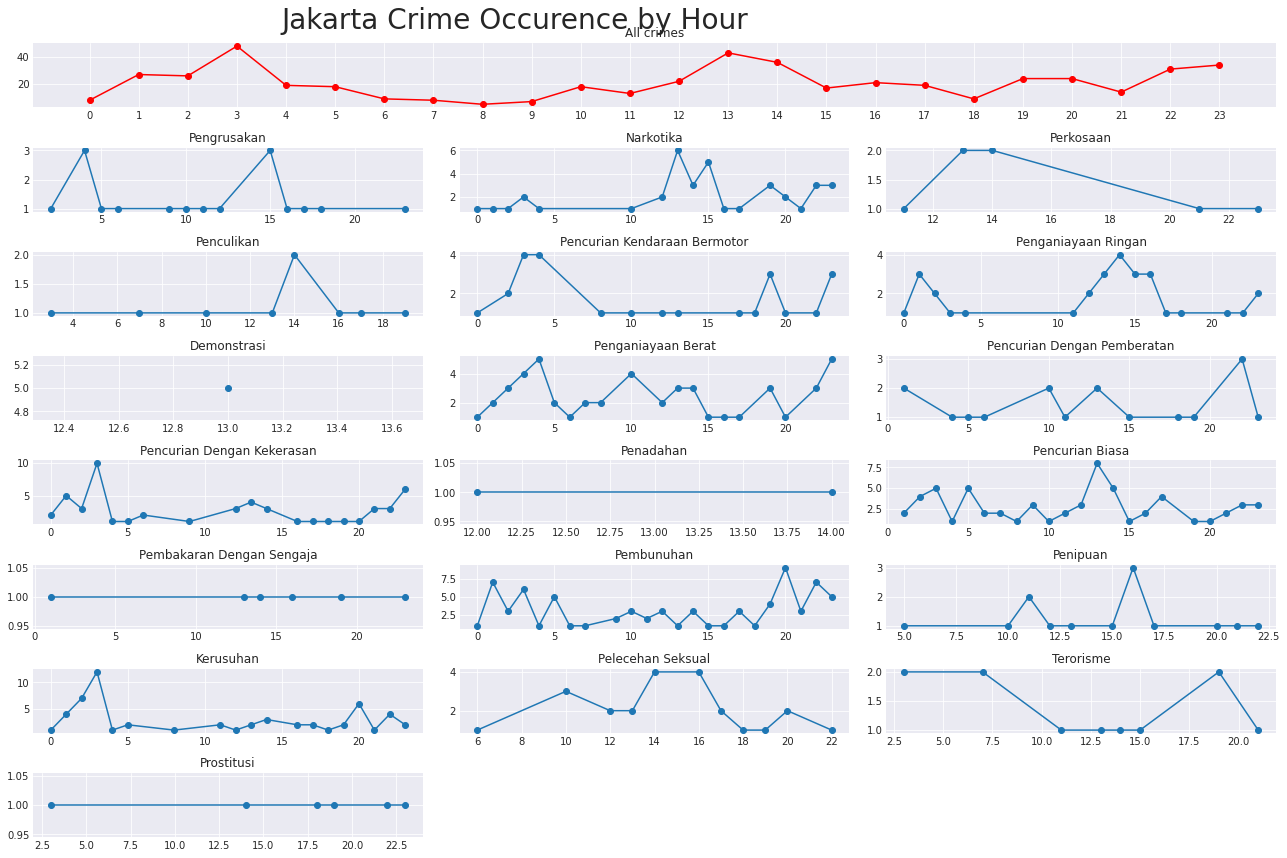

In [27]:
import pylab
import numpy as np
pylab.rcParams['figure.figsize'] = (18.0, 13.0)

PR = df[df['Category'] == 'Pengrusakan']
N = df[df['Category'] == 'Narkotika']
PK = df[df['Category'] == 'Perkosaan']
PC = df[df['Category'] == 'Penculikan']
PKB = df[df['Category'] == 'Pencurian Kendaraan Bermotor']
PNR = df[df['Category'] == 'Penganiayaan Ringan']
D = df[df['Category'] == 'Demonstrasi']
PB = df[df['Category'] == 'Penganiayaan Berat']
PDP = df[df['Category'] == 'Pencurian Dengan Pemberatan']
PDKR = df[df['Category'] == 'Pencurian Dengan Kekerasan']
PD = df[df['Category'] == 'Penadahan']
PBL = df[df['Category'] == 'Pencurian Biasa']
PDS = df[df['Category'] == 'Pembakaran Dengan Sengaja']
PMB = df[df['Category'] == 'Pembunuhan']
PP = df[df['Category'] == 'Penipuan']
KR = df[df['Category'] == 'Kerusuhan']
PS = df[df['Category'] == 'Pelecehan Seksual']
TR = df[df['Category'] == 'Terorisme']
PRS = df[df['Category'] == 'Prostitusi']


with plt.style.context('seaborn-darkgrid'):
    ax1 = plt.subplot2grid((9,3), (0, 0), colspan=3)
    ax1.plot(df.groupby('hour').size(), 'ro-')
    ax1.set_title ('All crimes')
    ax1.xaxis.set_ticks(np.arange(0, 24, 1))
    
    ax2 = plt.subplot2grid((9,3), (1, 0))
    ax2.plot(PR.groupby('hour').size(), 'o-')
    ax2.set_title ('Pengrusakan')
    
    ax4 = plt.subplot2grid((9,3), (1, 1))
    ax4.plot(N.groupby('hour').size(), 'o-')
    ax4.set_title ('Narkotika')
    
    ax5 = plt.subplot2grid((9,3), (1, 2))
    ax5.plot(PK.groupby('hour').size(), 'o-')
    ax5.set_title ('Perkosaan')
    
    ax7 = plt.subplot2grid((9,3), (2,0))
    ax7.plot(PC.groupby('hour').size(), 'o-')
    ax7.set_title ('Penculikan')
    
    ax8 = plt.subplot2grid((9,3), (2, 1))
    ax8.plot(PKB.groupby('hour').size(), 'o-')
    ax8.set_title ('Pencurian Kendaraan Bermotor')
    
    ax9 = plt.subplot2grid((9,3), (2,2))
    ax9.plot(PNR.groupby('hour').size(), 'o-')
    ax9.set_title ('Penganiayaan Ringan')
    
    ax10 = plt.subplot2grid((9,3), (3,0))
    ax10.plot(D.groupby('hour').size(), 'o-')
    ax10.set_title ('Demonstrasi')
    
    ax11 = plt.subplot2grid((9,3), (3, 1))
    ax11.plot(PB.groupby('hour').size(), 'o-')
    ax11.set_title ('Penganiayaan Berat')
    
    ax12 = plt.subplot2grid((9,3), (3,2))
    ax12.plot(PDP.groupby('hour').size(), 'o-')
    ax12.set_title ('Pencurian Dengan Pemberatan')
    
    ax13 = plt.subplot2grid((9,3), (4,0))
    ax13.plot(PDKR.groupby('hour').size(), 'o-')
    ax13.set_title ('Pencurian Dengan Kekerasan')
    
    ax14 = plt.subplot2grid((9,3), (4, 1))
    ax14.plot(PD.groupby('hour').size(), 'o-')
    ax14.set_title ('Penadahan')
    
    ax15 = plt.subplot2grid((9,3), (4,2))
    ax15.plot(PBL.groupby('hour').size(), 'o-')
    ax15.set_title ('Pencurian Biasa')
    
    ax16 = plt.subplot2grid((9,3), (5,0))
    ax16.plot(PDS.groupby('hour').size(), 'o-')
    ax16.set_title ('Pembakaran Dengan Sengaja')
    
    ax17 = plt.subplot2grid((9,3), (5, 1))
    ax17.plot(PMB.groupby('hour').size(), 'o-')
    ax17.set_title ('Pembunuhan')
    
    ax18 = plt.subplot2grid((9,3), (5,2))
    ax18.plot(PP.groupby('hour').size(), 'o-')
    ax18.set_title ('Penipuan')
    
    
    ax20 = plt.subplot2grid((9,3), (6,0))
    ax20.plot(KR.groupby('hour').size(), 'o-')
    ax20.set_title ('Kerusuhan')

    ax21 = plt.subplot2grid((9,3), (6,1))
    ax21.plot(PS.groupby('hour').size(), 'o-')
    ax21.set_title ('Pelecehan Seksual')
    
    ax22 = plt.subplot2grid((9,3), (6,2))
    ax22.plot(TR.groupby('hour').size(), 'o-')
    ax22.set_title ('Terorisme')
    
    ax23 = plt.subplot2grid((9,3), (7,0))
    ax23.plot(PRS.groupby('hour').size(), 'o-')
    ax23.set_title ('Prostitusi')
  
    pylab.gcf().text(0.4, 1.01, 
                    'Jakarta Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout()
plt.show()

**Crime ocurrence by day of the week**

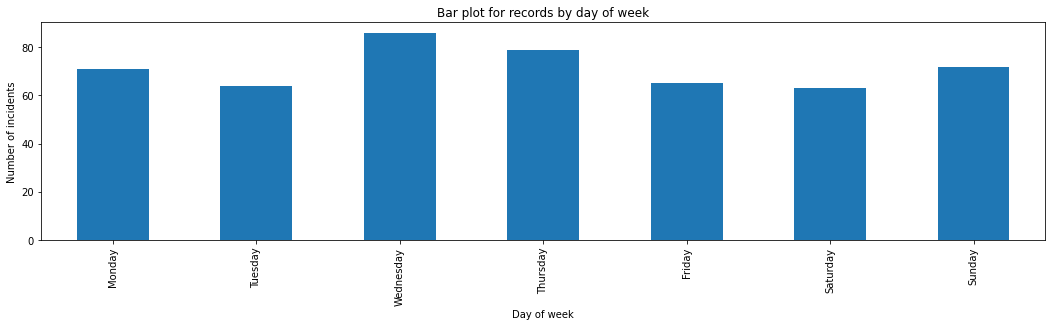

In [28]:
data = df.groupby('DayOfWeek').count().iloc[:, 0]
data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(18, 4))
data.plot(kind='bar')
plt.title('Bar plot for records by day of week')
plt.xlabel("Day of week")
plt.ylabel("Number of incidents")
plt.show()

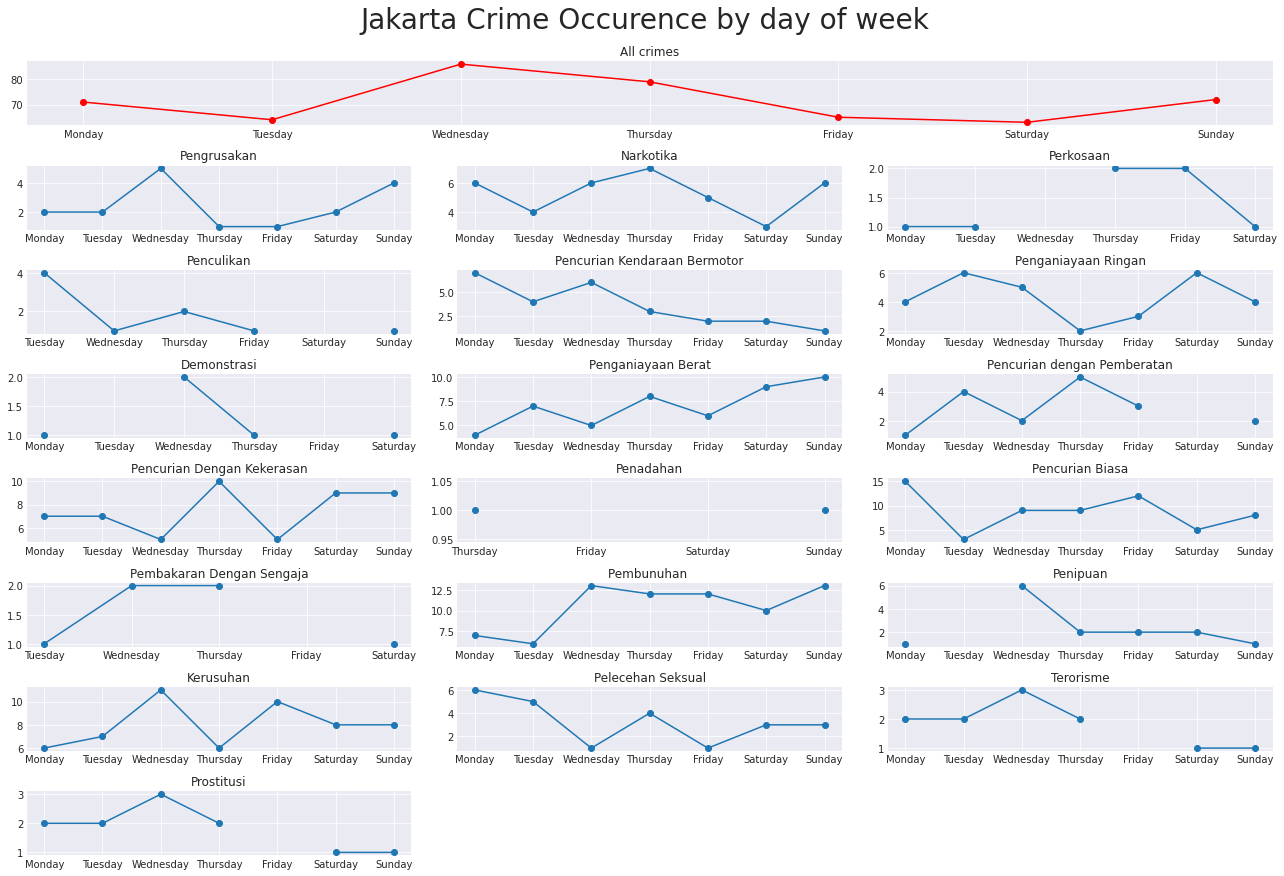

In [29]:
pylab.rcParams['figure.figsize'] = (18.0, 13.0)

PR = df[df['Category'] == 'Pengrusakan']
N = df[df['Category'] == 'Narkotika']
PK = df[df['Category'] == 'Perkosaan']
PC = df[df['Category'] == 'Penculikan']
PKB = df[df['Category'] == 'Pencurian Kendaraan Bermotor']
PNR = df[df['Category'] == 'Penganiayaan Ringan']
D = df[df['Category'] == 'Demonstrasi']
PB = df[df['Category'] == 'Penganiayaan Berat']
PDP = df[df['Category'] == 'Pencurian Dengan Pemberatan']
PDKR = df[df['Category'] == 'Pencurian Dengan Kekerasan']
PD = df[df['Category'] == 'Penadahan']
PBL = df[df['Category'] == 'Pencurian Biasa']
PDS = df[df['Category'] == 'Pembakaran Dengan Sengaja']
PMB = df[df['Category'] == 'Pembunuhan']
PP = df[df['Category'] == 'Penipuan']
KR = df[df['Category'] == 'Kerusuhan']
PS = df[df['Category'] == 'Pelecehan Seksual']
TR = df[df['Category'] == 'Terorisme']
PRS = df[df['Category'] == 'Prostitusi']

with plt.style.context('seaborn-darkgrid'):
    ax1 = plt.subplot2grid((9,3), (0, 0), colspan=3)
    data = df.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax1.plot(data, 'ro-')
    ax1.set_title ('All crimes')
    ax1.xaxis.set_ticks(np.arange(0, 7, 1))

    ax2 = plt.subplot2grid((9,3), (1, 0))
    data = PR.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax2.plot(data, 'o-')
    ax2.set_title ('Pengrusakan')

    ax4 = plt.subplot2grid((9,3), (1, 1))
    data = N.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax4.plot(data, 'o-')
    ax4.set_title ('Narkotika')

    ax5 = plt.subplot2grid((9,3), (1, 2))
    data = PK.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax5.plot(data, 'o-')
    ax5.set_title ('Perkosaan')

    ax7 = plt.subplot2grid((9,3), (2,0))
    data = PC.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax7.plot(data, 'o-')
    ax7.set_title ('Penculikan')

    ax8 = plt.subplot2grid((9,3), (2, 1))
    data = PKB.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax8.plot(data, 'o-')
    ax8.set_title ('Pencurian Kendaraan Bermotor')

    ax9 = plt.subplot2grid((9,3), (2,2))
    data = PNR.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax9.plot(data, 'o-')
    ax9.set_title ('Penganiayaan Ringan')

    ax10 = plt.subplot2grid((9,3), (3,0))
    data = D.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax10.plot(data, 'o-')
    ax10.set_title ('Demonstrasi')

    ax11 = plt.subplot2grid((9,3), (3, 1))
    data = PB.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax11.plot(data, 'o-')
    ax11.set_title ('Penganiayaan Berat')

    ax12 = plt.subplot2grid((9,3), (3,2))
    data = PDP.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax12.plot(data, 'o-')
    ax12.set_title ('Pencurian dengan Pemberatan')

    ax13 = plt.subplot2grid((9,3), (4,0))
    data = PDKR.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax13.plot(data, 'o-')
    ax13.set_title ('Pencurian Dengan Kekerasan')

    ax14 = plt.subplot2grid((9,3), (4, 1))
    data = PD.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax14.plot(data, 'o-')
    ax14.set_title ('Penadahan')

    ax15 = plt.subplot2grid((9,3), (4,2))
    data = PBL.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax15.plot(data, 'o-')
    ax15.set_title ('Pencurian Biasa')

    ax16 = plt.subplot2grid((9,3), (5,0))
    data = PDS.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax16.plot(data, 'o-')
    ax16.set_title ('Pembakaran Dengan Sengaja')

    ax17 = plt.subplot2grid((9,3), (5, 1))
    data = PMB.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax17.plot(data, 'o-')
    ax17.set_title ('Pembunuhan ')

    ax18 = plt.subplot2grid((9,3), (5,2))
    data = PP.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax18.plot(data, 'o-')
    ax18.set_title ('Penipuan')

    
    ax20 = plt.subplot2grid((9,3), (6,0))
    data = KR.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax20.plot(data, 'o-')
    ax20.set_title ('Kerusuhan')

    ax21 = plt.subplot2grid((9,3), (6,1))
    data = PS.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax21.plot(data, 'o-')
    ax21.set_title ('Pelecehan Seksual')

    ax22 = plt.subplot2grid((9,3), (6,2))
    data = TR.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax22.plot(data, 'o-')
    ax22.set_title ('Terorisme')
    
    ax23 = plt.subplot2grid((9,3), (7,0))
    data = TR.groupby('DayOfWeek').size()
    data = data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    ax23.plot(data, 'o-')
    ax23.set_title ('Prostitusi')
  
    pylab.gcf().text(0.5, 1.03, 
                    'Jakarta Crime Occurence by day of week',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout()
plt.show()

**Crime ocurrence by day of the month**

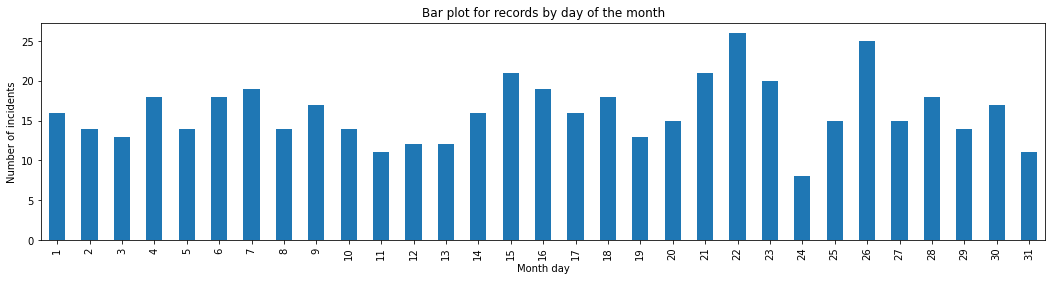

In [30]:
plt.figure(figsize=(18, 4))

days_event=df.groupby(by='day').count()
days_event.iloc[:,0].plot(kind='bar')
plt.title('Bar plot for records by day of the month')
plt.xlabel("Month day")
plt.ylabel("Number of incidents")
plt.show()

**Crime ocurrence by month**

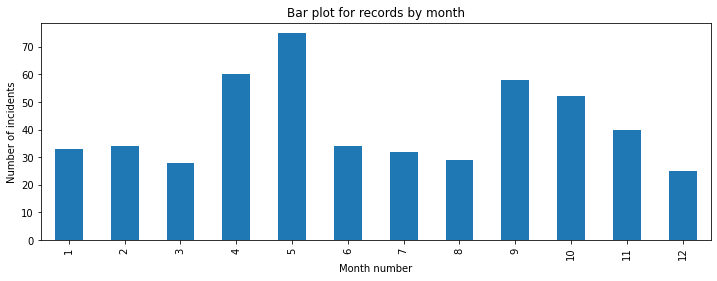

In [31]:
plt.figure(figsize=(12, 4))

months_event=df.groupby(by='month').count()
months_event.iloc[:,0].plot(kind='bar')
plt.title('Bar plot for records by month')
plt.xlabel("Month number")
plt.ylabel("Number of incidents")
plt.show()

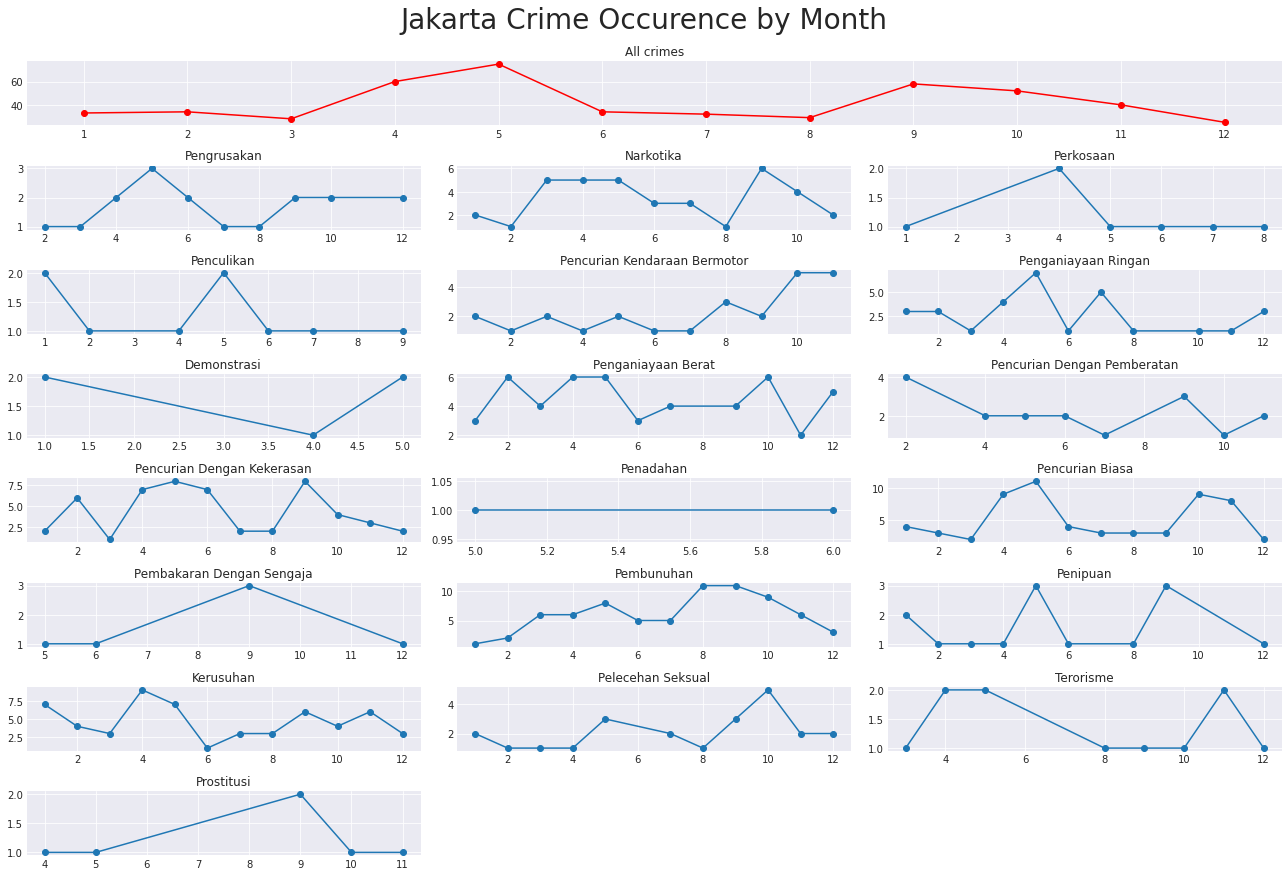

In [32]:
pylab.rcParams['figure.figsize'] = (18.0, 13.0)

PR = df[df['Category'] == 'Pengrusakan']
PDK = df[df['Category'] == 'Pencurian Dalam Keluarga']
N = df[df['Category'] == 'Narkotika']
PK = df[df['Category'] == 'Perkosaan']
PRI = df[df['Category'] == 'Pencurian Ringan']
PC = df[df['Category'] == 'Penculikan']
PKB = df[df['Category'] == 'Pencurian Kendaraan Bermotor']
PNR = df[df['Category'] == 'Penganiayaan Ringan']
D = df[df['Category'] == 'Demonstrasi']
PB = df[df['Category'] == 'Penganiayaan Berat']
PDP = df[df['Category'] == 'Pencurian Dengan Pemberatan']
PDKR = df[df['Category'] == 'Pencurian Dengan Kekerasan']
PD = df[df['Category'] == 'Penadahan']
PBL = df[df['Category'] == 'Pencurian Biasa']
PDS = df[df['Category'] == 'Pembakaran Dengan Sengaja']
PMB = df[df['Category'] == 'Pembunuhan']
PP = df[df['Category'] == 'Penipuan']
OK = df[df['Category'] == 'Obat Keras']

with plt.style.context('seaborn-darkgrid'):
    ax1 = plt.subplot2grid((9,3), (0, 0), colspan=3)
    ax1.plot(df.groupby('month').size(), 'ro-')
    ax1.set_title ('All crimes')
    ax1.xaxis.set_ticks(np.arange(1, 13, 1))

    ax2 = plt.subplot2grid((9,3), (1, 0))
    ax2.plot(PR.groupby('month').size(), 'o-')
    ax2.set_title ('Pengrusakan')
    
    ax4 = plt.subplot2grid((9,3), (1, 1))
    ax4.plot(N.groupby('month').size(), 'o-')
    ax4.set_title ('Narkotika')
    
    ax5 = plt.subplot2grid((9,3), (1, 2))
    ax5.plot(PK.groupby('month').size(), 'o-')
    ax5.set_title ('Perkosaan')
    
    ax7 = plt.subplot2grid((9,3), (2,0))
    ax7.plot(PC.groupby('month').size(), 'o-')
    ax7.set_title ('Penculikan')
    
    ax8 = plt.subplot2grid((9,3), (2, 1))
    ax8.plot(PKB.groupby('month').size(), 'o-')
    ax8.set_title ('Pencurian Kendaraan Bermotor')
    
    ax9 = plt.subplot2grid((9,3), (2,2))
    ax9.plot(PNR.groupby('month').size(), 'o-')
    ax9.set_title ('Penganiayaan Ringan')
    
    ax10 = plt.subplot2grid((9,3), (3,0))
    ax10.plot(D.groupby('month').size(), 'o-')
    ax10.set_title ('Demonstrasi')
    
    ax11 = plt.subplot2grid((9,3), (3, 1))
    ax11.plot(PB.groupby('month').size(), 'o-')
    ax11.set_title ('Penganiayaan Berat')
    
    ax12 = plt.subplot2grid((9,3), (3,2))
    ax12.plot(PDP.groupby('month').size(), 'o-')
    ax12.set_title ('Pencurian Dengan Pemberatan')
    
    ax13 = plt.subplot2grid((9,3), (4,0))
    ax13.plot(PDKR.groupby('month').size(), 'o-')
    ax13.set_title ('Pencurian Dengan Kekerasan')
    
    ax14 = plt.subplot2grid((9,3), (4, 1))
    ax14.plot(PD.groupby('month').size(), 'o-')
    ax14.set_title ('Penadahan')
    
    ax15 = plt.subplot2grid((9,3), (4,2))
    ax15.plot(PBL.groupby('month').size(), 'o-')
    ax15.set_title ('Pencurian Biasa')
    
    ax16 = plt.subplot2grid((9,3), (5,0))
    ax16.plot(PDS.groupby('month').size(), 'o-')
    ax16.set_title ('Pembakaran Dengan Sengaja')
    
    ax17 = plt.subplot2grid((9,3), (5, 1))
    ax17.plot(PMB.groupby('month').size(), 'o-')
    ax17.set_title ('Pembunuhan')
    
    ax18 = plt.subplot2grid((9,3), (5,2))
    ax18.plot(PP.groupby('month').size(), 'o-')
    ax18.set_title ('Penipuan')
    
    
    ax20 = plt.subplot2grid((9,3), (6,0))
    ax20.plot(KR.groupby('month').size(), 'o-')
    ax20.set_title ('Kerusuhan')

    ax21 = plt.subplot2grid((9,3), (6,1))
    ax21.plot(PS.groupby('month').size(), 'o-')
    ax21.set_title ('Pelecehan Seksual')
    
    ax22 = plt.subplot2grid((9,3), (6,2))
    ax22.plot(TR.groupby('month').size(), 'o-')
    ax22.set_title ('Terorisme')
    
    ax23 = plt.subplot2grid((9,3), (7,0))
    ax23.plot(PRS.groupby('month').size(), 'o-')
    ax23.set_title ('Prostitusi')
  
    pylab.gcf().text(0.5, 1.03, 
                    'Jakarta Crime Occurence by Month',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout()
plt.show()

**Crime ocurrence by year**

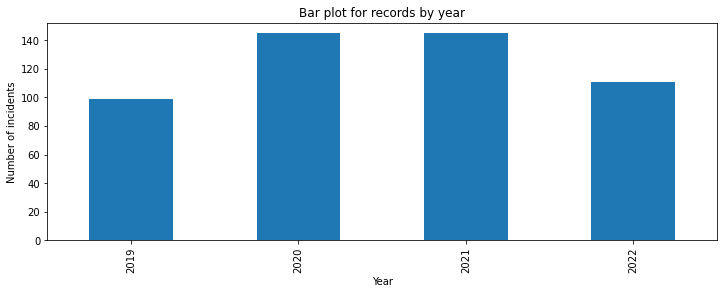

In [33]:
plt.figure(figsize=(12, 4))

years_event=df.groupby(by='year').count()
years_event.iloc[:,0].plot(kind='bar')
plt.title('Bar plot for records by year')
plt.xlabel("Year")
plt.ylabel("Number of incidents")
plt.show()

In [34]:
df_ct=pd.crosstab(df['year'], df['Category'], rownames=['year'], colnames=['Category'])
df_ct

Category,Demonstrasi,Kerusuhan,Narkotika,Pelecehan Seksual,Pembakaran Dengan Sengaja,Pembunuhan,Penadahan,Penculikan,Pencurian Biasa,Pencurian Dengan Kekerasan,Pencurian Dengan Pemberatan,Pencurian Kendaraan Bermotor,Penganiayaan Berat,Penganiayaan Ringan,Pengrusakan,Penipuan,Perkosaan,Prostitusi,Terorisme
year,,,,,,,,,,,,,,,,,,,
2019,1,8,12,4,3,16,0,2,7,15,2,7,7,4,3,2,0,0,6
2020,2,23,9,6,2,27,0,4,15,15,5,4,12,8,6,3,0,2,2
2021,0,12,10,8,0,21,1,1,21,12,5,9,18,8,5,6,3,3,2
2022,2,13,6,5,1,9,1,2,18,10,5,5,12,10,3,3,4,1,1


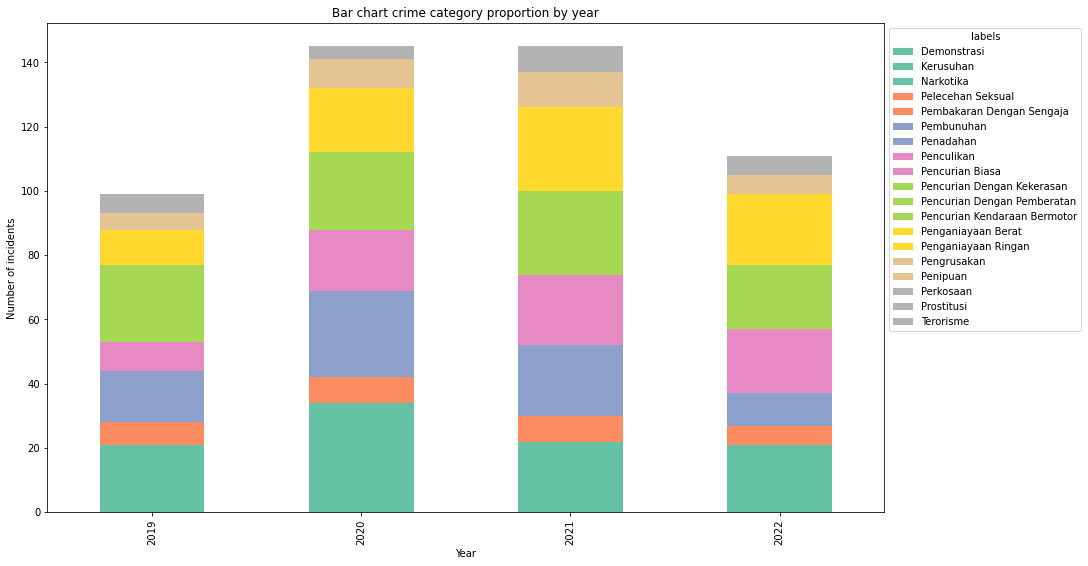

In [35]:
ax = df_ct.plot(kind='bar', stacked=True, figsize=(15, 9), colormap='Set2')
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.title('Bar chart crime category proportion by year')
ax.set_ylabel('Number of incidents')
ax.set_xlabel('Year')
plt.show()

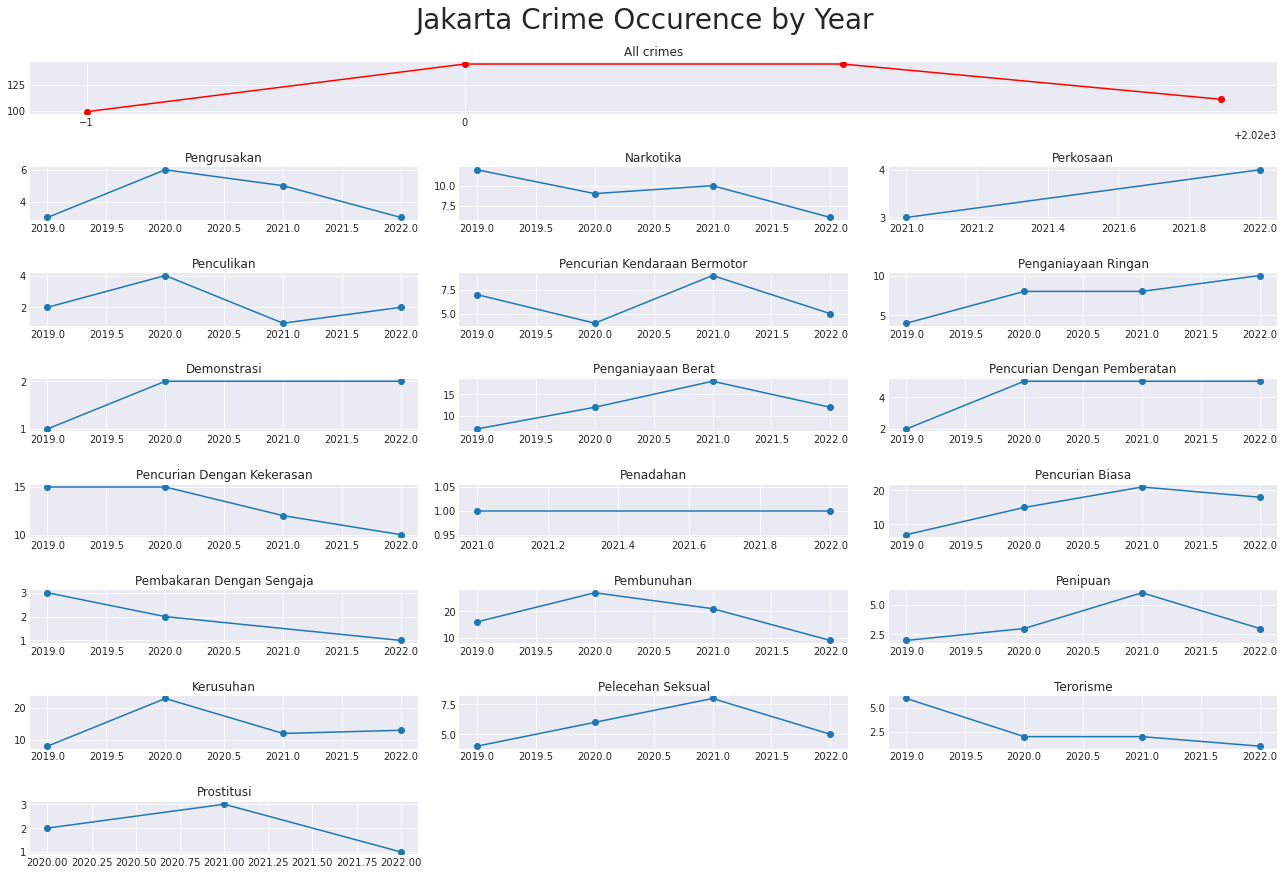

In [36]:
pylab.rcParams['figure.figsize'] = (18.0, 13.0)

PR = df[df['Category'] == 'Pengrusakan']
PDK = df[df['Category'] == 'Pencurian Dalam Keluarga']
N = df[df['Category'] == 'Narkotika']
PK = df[df['Category'] == 'Perkosaan']
PRI = df[df['Category'] == 'Pencurian Ringan']
PC = df[df['Category'] == 'Penculikan']
PKB = df[df['Category'] == 'Pencurian Kendaraan Bermotor']
PNR = df[df['Category'] == 'Penganiayaan Ringan']
D = df[df['Category'] == 'Demonstrasi']
PB = df[df['Category'] == 'Penganiayaan Berat']
PDP = df[df['Category'] == 'Pencurian Dengan Pemberatan']
PDKR = df[df['Category'] == 'Pencurian Dengan Kekerasan']
PD = df[df['Category'] == 'Penadahan']
PBL = df[df['Category'] == 'Pencurian Biasa']
PDS = df[df['Category'] == 'Pembakaran Dengan Sengaja']
PMB = df[df['Category'] == 'Pembunuhan']
PP = df[df['Category'] == 'Penipuan']
OK = df[df['Category'] == 'Obat Keras']
PDS = df[df['Category'] == 'Pembakaran Dengan Sengaja']
PMB = df[df['Category'] == 'Pembunuhan']
PP = df[df['Category'] == 'Penipuan']
OK = df[df['Category'] == 'Obat Keras']

with plt.style.context('seaborn-darkgrid'):
    ax1 = plt.subplot2grid((9,3), (0, 0), colspan=3)
    ax1.plot(df.groupby('year').size(), 'ro-')
    ax1.set_title ('All crimes')
    ax1.xaxis.set_ticks(np.arange(2019, 2021, 1))

    ax2 = plt.subplot2grid((9,3), (1, 0))
    ax2.plot(PR.groupby('year').size(), 'o-')
    ax2.set_title ('Pengrusakan')
    
    ax4 = plt.subplot2grid((9,3), (1, 1))
    ax4.plot(N.groupby('year').size(), 'o-')
    ax4.set_title ('Narkotika')
    
    ax5 = plt.subplot2grid((9,3), (1, 2))
    ax5.plot(PK.groupby('year').size(), 'o-')
    ax5.set_title ('Perkosaan')
    
    ax7 = plt.subplot2grid((9,3), (2,0))
    ax7.plot(PC.groupby('year').size(), 'o-')
    ax7.set_title ('Penculikan')
    
    ax8 = plt.subplot2grid((9,3), (2, 1))
    ax8.plot(PKB.groupby('year').size(), 'o-')
    ax8.set_title ('Pencurian Kendaraan Bermotor')
    
    ax9 = plt.subplot2grid((9,3), (2,2))
    ax9.plot(PNR.groupby('year').size(), 'o-')
    ax9.set_title ('Penganiayaan Ringan')
    
    ax10 = plt.subplot2grid((9,3), (3,0))
    ax10.plot(D.groupby('year').size(), 'o-')
    ax10.set_title ('Demonstrasi')
    
    ax11 = plt.subplot2grid((9,3), (3, 1))
    ax11.plot(PB.groupby('year').size(), 'o-')
    ax11.set_title ('Penganiayaan Berat')
    
    ax12 = plt.subplot2grid((9,3), (3,2))
    ax12.plot(PDP.groupby('year').size(), 'o-')
    ax12.set_title ('Pencurian Dengan Pemberatan')
    
    ax13 = plt.subplot2grid((9,3), (4,0))
    ax13.plot(PDKR.groupby('year').size(), 'o-')
    ax13.set_title ('Pencurian Dengan Kekerasan')
    
    ax14 = plt.subplot2grid((9,3), (4, 1))
    ax14.plot(PD.groupby('year').size(), 'o-')
    ax14.set_title ('Penadahan')
    
    ax15 = plt.subplot2grid((9,3), (4,2))
    ax15.plot(PBL.groupby('year').size(), 'o-')
    ax15.set_title ('Pencurian Biasa')
    
    ax16 = plt.subplot2grid((9,3), (5,0))
    ax16.plot(PDS.groupby('year').size(), 'o-')
    ax16.set_title ('Pembakaran Dengan Sengaja')
    
    ax17 = plt.subplot2grid((9,3), (5, 1))
    ax17.plot(PMB.groupby('year').size(), 'o-')
    ax17.set_title ('Pembunuhan')
    
    ax18 = plt.subplot2grid((9,3), (5,2))
    ax18.plot(PP.groupby('year').size(), 'o-')
    ax18.set_title ('Penipuan')
    
    
    ax20 = plt.subplot2grid((9,3), (6,0))
    ax20.plot(KR.groupby('year').size(), 'o-')
    ax20.set_title ('Kerusuhan')

    ax21 = plt.subplot2grid((9,3), (6,1))
    ax21.plot(PS.groupby('year').size(), 'o-')
    ax21.set_title ('Pelecehan Seksual')
    
    ax22 = plt.subplot2grid((9,3), (6,2))
    ax22.plot(TR.groupby('year').size(), 'o-')
    ax22.set_title ('Terorisme')
    
    ax23 = plt.subplot2grid((9,3), (7,0))
    ax23.plot(PRS.groupby('year').size(), 'o-')
    ax23.set_title ('Prostitusi')
  
    pylab.gcf().text(0.5, 1.03, 
                    'Jakarta Crime Occurence by Year',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout()
plt.show()

## Feature Engineering

In [37]:
df4 = df[['Category','DayOfWeek','PdDistrict','Address','X','Y','year','month','day','hour']]
df4.sample(3)

,Category,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour
190,Pencurian Kendaraan Bermotor,Wednesday,Tambora,Tambora,106.802767,-6.136573,2019,10,2,2
112,Pencurian Biasa,Saturday,Cengkareng,Cengkareng,106.729207,-6.129771,2021,4,10,23
183,Terorisme,Monday,Cilincing,Cilincing,106.923907,-6.136142,2019,9,23,14


In [38]:
print(df4.columns.tolist())

['Category', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'year', 'month', 'day', 'hour']


Firstly, despite the fact that we will use a Tree-based algorithm to classify the instances we will scale all our features in order to have all of them more meaningful and easier to understand/follow.

For this we have to min-max scale the longitude and latitude coordinates so as to have them numbers between 0 to 1:

In [39]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [40]:
df4.loc[:,['X','Y']] = mm.fit_transform(df4.loc[:,['X','Y']])

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


We will one-hot-encode the date components as they make more sense as nominal categorical variables rather than ordinal variables, this is because we don't see a linear relation of crimes with the hour or months, it does not have a linear relation, all crime types have a specific non-linear behaviour with time components, this is why setting them as one hot columns will obtain patterns about the most frequent hour, the month, or the day with more certain crimes.

In [41]:
nominal_variables = ['year','month','day','hour','DayOfWeek','PdDistrict']
df4 = pd.get_dummies(df4, columns = nominal_variables, drop_first=True) 

And finally the reason why we performed N-gram analysis, in the following cells we will associate columns to key words contained in the address:

In [42]:
df.PdDistrict.unique()

array(['Jagakarsa', 'Tebet', 'Cempaka Putih', 'Bekasi Selatan',
       'Pulogadung', 'Cikarang Selatan', 'Cikarang Timur', 'Cilincing',
       'Kembangan', 'Grogol Petamburan', 'Tanah Abang', 'Sawah Besar',
       'Cibinong', 'Gambir', 'Senen', 'Palmerah', 'Cibodas', 'Cilandak',
       'Cengkareng', 'Solear', 'Kemayoran', 'Tarumajaya', 'Balaraja',
       'Tambora', 'Tanjung Priok', 'Tajur Alam', 'Cipondoh',
       'Cikarang Utara', 'Ciracas', 'Pademangan', 'Pondok Gede',
       'Klapanunggal', 'Ciliwung', 'Ciomas', 'Kebagusan Raya', 'Legok',
       'Curug', 'Pasar Kemis', 'Larangan', 'Ciawi', 'Tigaraksa',
       'Bekasi Barat', 'Sukasari', 'Serpong', 'Mampang Prapatan',
       'Tanah Sareal', 'Ciputat Timur', 'Kebayoran Baru', 'Teluknaga',
       'Pamulang', 'Ciledug', 'Neglasari', 'Cisoka', 'Pagedangan',
       'Pinang', 'Senayan', 'Tangerang Selatan', 'Kosambi', 'Tangerang',
       'Jatiuwung', 'Pancoran', 'Kuningan', 'Kuningan Barat',
       'Kebayoran Lama', 'Pasar Minggu', 'Pesang

In [43]:
df4['Jagakarsa'] = df4['Address'].str.contains('Jagakarsa', case=False)
df4['Tebet'] = df4['Address'].str.contains('Tebet', case=False)
df4['Cempaka Putih'] = df4['Address'].str.contains('Cempaka Putih', case=False)
df4['Bekasi Selatan'] = df4['Address'].str.contains('Bekasi Selatan', case=False)
df4['Pulogadung'] = df4['Address'].str.contains('Pulogadung', case=False)
df4['Cikarang Selatan'] = df4['Address'].str.contains('Cikarang Selatan', case=False)
df4['Cikarang Timur'] = df4['Address'].str.contains('Cikarang Timur', case=False)
df4['Cilincing'] = df4['Address'].str.contains('Cilincing', case=False)
df4['Kembangan'] = df4['Address'].str.contains('Kembangan', case=False)
df4['Grogol Petamburan'] = df4['Address'].str.contains('Grogol Petamburan', case=False)
df4['Tanah Abang'] = df4['Address'].str.contains('Tanah Abang', case=False)
df4['Sawah Besar'] = df4['Address'].str.contains('Sawah Besar', case=False)
df4['Cibinong'] = df4['Address'].str.contains('Cibinong', case=False)
df4['Gambir'] = df4['Address'].str.contains('Gambir', case=False)
df4['Senen'] = df4['Address'].str.contains('Senen', case=False)
df4['Palmerah'] = df4['Address'].str.contains('Palmerah', case=False)
df4['Cibodas'] = df4['Address'].str.contains('Cibodas', case=False)
df4['Cilandak'] = df4['Address'].str.contains('Cilandak', case=False)
df4['Cengkareng'] = df4['Address'].str.contains('Cengkareng', case=False)
df4['Solear'] = df4['Address'].str.contains('Solear', case=False)
df4['Kemayoran'] = df4['Address'].str.contains('Kemayoran', case=False)
df4['Tarumajaya'] = df4['Address'].str.contains('Tarumajaya', case=False)
df4['Balaraja'] = df4['Address'].str.contains('Balaraja', case=False)
df4['Tambora'] = df4['Address'].str.contains('Tambora', case=False)
df4['Tanjung Priok'] = df4['Address'].str.contains('Tanjung Priok', case=False)
df4['Tajur Alam'] = df4['Address'].str.contains('Tajur Alam', case=False)
df4['Cipondoh'] = df4['Address'].str.contains('Cipondoh', case=False)
df4['Cikarang Utara'] = df4['Address'].str.contains('Cikarang Utara', case=False)
df4['Ciracas'] = df4['Address'].str.contains('Ciracas', case=False)
df4['Pademangan'] = df4['Address'].str.contains('Pademangan', case=False)
df4['Pondok Gede'] = df4['Address'].str.contains('Pondok Gede', case=False)
df4['Klapanunggal'] = df4['Address'].str.contains('Klapanunggal', case=False)
df4['Ciliwung'] = df4['Address'].str.contains('Ciliwung', case=False)
df4['Ciomas'] = df4['Address'].str.contains('Ciomas', case=False)
df4['Kebagusan Raya'] = df4['Address'].str.contains('Kebagusan Raya', case=False)
df4['Legok'] = df4['Address'].str.contains('Legok', case=False)
df4['Curug'] = df4['Address'].str.contains('Curug', case=False)
df4['Pasar Kemis'] = df4['Address'].str.contains('Pasar Kemis', case=False)
df4['Larangan'] = df4['Address'].str.contains('Larangan', case=False)
df4['Ciawi'] = df4['Address'].str.contains('Ciawi', case=False)
df4['Tigaraksa'] = df4['Address'].str.contains('Tigaraksa', case=False)
df4['Bekasi Barat'] = df4['Address'].str.contains('Bekasi Barat', case=False)
df4['Sukasari'] = df4['Address'].str.contains('Sukasari', case=False)
df4['Serpong'] = df4['Address'].str.contains('Serpong', case=False)
df4['Mampang Prapatan'] = df4['Address'].str.contains('Mampang Prapatan', case=False)
df4['Tanah Sareal'] = df4['Address'].str.contains('Tanah Sareal', case=False)
df4['Ciputat Timur'] = df4['Address'].str.contains('Ciputat Timur', case=False)
df4['Kebayoran Baru'] = df4['Address'].str.contains('Kebayoran Baru', case=False)
df4['Teluknaga'] = df4['Address'].str.contains('Teluknaga', case=False)
df4['Pamulang'] = df4['Address'].str.contains('Pamulang', case=False)
df4['Ciledug'] = df4['Address'].str.contains('Ciledug', case=False)
df4['Neglasari'] = df4['Address'].str.contains('Neglasari', case=False)
df4['Cisoka'] = df4['Address'].str.contains('Cisoka', case=False)
df4['Pagedangan'] = df4['Address'].str.contains('Pagedangan', case=False)
df4['Pinang'] = df4['Address'].str.contains('Pinang', case=False)
df4['Senayan'] = df4['Address'].str.contains('Senayan', case=False)
df4['Tangerang Selatan'] = df4['Address'].str.contains('Tangerang Selatan', case=False)
df4['Kosambi'] = df4['Address'].str.contains('Kosambi', case=False)
df4['Tangerang'] = df4['Address'].str.contains('Tangerang', case=False)
df4['Jatiuwung'] = df4['Address'].str.contains('Jatiuwung', case=False)
df4['Pancoran'] = df4['Address'].str.contains('Pancoran', case=False)
df4['Kuningan'] = df4['Address'].str.contains('Kuningan', case=False)
df4['Kuningan Barat'] = df4['Address'].str.contains('Kuningan Barat', case=False)
df4['Kebayoran Lama'] = df4['Address'].str.contains('Kebayoran Lama', case=False)
df4['Pasar Minggu'] = df4['Address'].str.contains('Pasar Minggu', case=False)
df4['Pesanggrahan'] = df4['Address'].str.contains('Pesanggrahan', case=False)
df4['Setiabudi'] = df4['Address'].str.contains('Setiabudi', case=False)
df4['Kemang'] = df4['Address'].str.contains('Kemang', case=False)
df4['Jatinegara'] = df4['Address'].str.contains('Jatinegara', case=False)
df4['Cakung'] = df4['Address'].str.contains('Cakung', case=False)
df4['Cisarua'] = df4['Address'].str.contains('Cisarua', case=False)
df4['Jatisampurna'] = df4['Address'].str.contains('Jatisampurna', case=False)
df4['Sukatani'] = df4['Address'].str.contains('Sukatani', case=False)
df4['Makasar'] = df4['Address'].str.contains('Makasar', case=False)
df4['Matraman'] = df4['Address'].str.contains('Matraman', case=False)
df4['Pancoran Mas'] = df4['Address'].str.contains('Pancoran Mas', case=False)
df4['Koja'] = df4['Address'].str.contains('Koja', case=False)
df4['Tamansari'] = df4['Address'].str.contains('Tamansari', case=False)
df4['Kalideres'] = df4['Address'].str.contains('Kalideres', case=False)
df4['Kelapa Gading'] = df4['Address'].str.contains('Kelapa Gading', case=False)
df4['Bogor Utara'] = df4['Address'].str.contains('Bogor Utara', case=False)
df4['Tanjung Duren'] = df4['Address'].str.contains('Tanjung Duren', case=False)
df4['Jababeka'] = df4['Address'].str.contains('Jababeka', case=False)
df4['Penjaringan'] = df4['Address'].str.contains('Penjaringan', case=False)
df4['MustikaJaya'] = df4['Address'].str.contains('MustikaJaya', case=False)
df4['Cimanggis'] = df4['Address'].str.contains('Cimanggis', case=False)
df4['Kramat Jati'] = df4['Address'].str.contains('Kramat Jati', case=False)
df4['Kebon Jeruk'] = df4['Address'].str.contains('Kebon Jeruk', case=False)
df4['Menteng'] = df4['Address'].str.contains('Menteng', case=False)
df4['Kaliabang'] = df4['Address'].str.contains('Kaliabang', case=False)
df4['Durensawit'] = df4['Address'].str.contains('Durensawit', case=False)
df4['Slipi'] = df4['Address'].str.contains('Slipi', case=False)
df4['Cikarang'] = df4['Address'].str.contains('Cikarang', case=False)
df4['Beji'] = df4['Address'].str.contains('Beji', case=False)
df4['Sukmajaya'] = df4['Address'].str.contains('Sukmajaya', case=False)
df4['Cipayung'] = df4['Address'].str.contains('Cipayung', case=False)
df4['Limo'] = df4['Address'].str.contains('Limo', case=False)
df4['Tambun Selatan'] = df4['Address'].str.contains('Tambun Selatan', case=False)
df4['Bogor Tengah'] = df4['Address'].str.contains('Bogor Tengah', case=False)
df4['Taman Sari'] = df4['Address'].str.contains('Taman Sari', case=False)
df4['Rawamangun'] = df4['Address'].str.contains('Rawamangun', case=False)
df4['Ciputat'] = df4['Address'].str.contains('Ciputat', case=False)
df4['Bojong Gede'] = df4['Address'].str.contains('Bojong Gede', case=False)
df4['Panongan'] = df4['Address'].str.contains('Panongan', case=False)
df4['Depok'] = df4['Address'].str.contains('Depok', case=False)
df4['Duren Sawit'] = df4['Address'].str.contains('Duren Sawit', case=False)
df4['Sindang Jaya'] = df4['Address'].str.contains('Sindang Jaya', case=False)
df4['Rawalumbu'] = df4['Address'].str.contains('Rawalumbu', case=False)
df4['Periuk'] = df4['Address'].str.contains('Periuk', case=False)
df4['Bekasi Utara'] = df4['Address'].str.contains('Bekasi Utara', case=False)
df4['Pancoranmas'] = df4['Address'].str.contains('Pancoranmas', case=False)
df4['Bekasi'] = df4['Address'].str.contains('Bekasi', case=False)
df4['Benda'] = df4['Address'].str.contains('Benda', case=False)
df4['Johar Baru'] = df4['Address'].str.contains('Johar Baru', case=False)
df4['Jakarta Selatan'] = df4['Address'].str.contains('Jakarta Selatan', case=False)
df4['Pondok Aren'] = df4['Address'].str.contains('Pondok Aren', case=False)
df4['Bekasi Timur'] = df4['Address'].str.contains('Bekasi Timur', case=False)
df4['Bogor Selatan'] = df4['Address'].str.contains('Bogor Selatan', case=False)
df4['Ciampea'] = df4['Address'].str.contains('Ciampea', case=False)
df4['Sawangan'] = df4['Address'].str.contains('Sawangan', case=False)
df4['Jakarta Timur'] = df4['Address'].str.contains('Jakarta Timur', case=False)
df4['Kembangan Utara'] = df4['Address'].str.contains('Kembangan Utara', case=False)
df4['Muara Baru'] = df4['Address'].str.contains('Muara Baru', case=False)
df4['Megamendung'] = df4['Address'].str.contains('Megamendung', case=False)
df4['Tapos'] = df4['Address'].str.contains('Tapos', case=False)
df4['Pulo Gadung'] = df4['Address'].str.contains('Pulo Gadung', case=False)
df4['Cisauk'] = df4['Address'].str.contains('Cisauk', case=False)
df4['Jatiasih'] = df4['Address'].str.contains('Jatiasih', case=False)
df4['Cijeruk'] = df4['Address'].str.contains('Cijeruk', case=False)


In [44]:
df4[['Jagakarsa', 'Tebet', 'Cempaka Putih', 'Bekasi Selatan',
       'Pulogadung', 'Cikarang Selatan', 'Cikarang Timur', 'Cilincing',
       'Kembangan', 'Grogol Petamburan', 'Tanah Abang', 'Sawah Besar',
       'Cibinong', 'Gambir', 'Senen', 'Palmerah', 'Cibodas', 'Cilandak',
       'Cengkareng', 'Solear', 'Kemayoran', 'Tarumajaya', 'Balaraja',
       'Tambora', 'Tanjung Priok', 'Tajur Alam', 'Cipondoh',
       'Cikarang Utara', 'Ciracas', 'Pademangan', 'Pondok Gede',
       'Klapanunggal', 'Ciliwung', 'Ciomas', 'Kebagusan Raya', 'Legok',
       'Curug', 'Pasar Kemis', 'Larangan', 'Ciawi', 'Tigaraksa',
       'Bekasi Barat', 'Sukasari', 'Serpong', 'Mampang Prapatan',
       'Tanah Sareal', 'Ciputat Timur', 'Kebayoran Baru', 'Teluknaga',
       'Pamulang', 'Ciledug', 'Neglasari', 'Cisoka', 'Pagedangan',
       'Pinang', 'Senayan', 'Tangerang Selatan', 'Kosambi', 'Tangerang',
       'Jatiuwung', 'Pancoran', 'Kuningan', 'Kuningan Barat',
       'Kebayoran Lama', 'Pasar Minggu', 'Pesanggrahan', 'Setiabudi',
       'Kemang', 'Jatinegara', 'Cakung', 'Cisarua', 'Jatisampurna',
       'Sukatani', 'Makasar', 'Matraman', 'Pancoran Mas', 'Koja',
       'Tamansari', 'Kalideres', 'Kelapa Gading', 'Bogor Utara',
       'Tanjung Duren', 'Jababeka', 'Penjaringan', 'MustikaJaya',
       'Cimanggis', 'Kramat Jati', 'Kebon Jeruk',
       'Menteng', 'Kaliabang', 'Durensawit', 'Slipi', 'Cikarang', 'Beji',
       'Sukmajaya', 'Cipayung', 'Limo', 'Tambun Selatan', 'Bogor Tengah',
       'Taman Sari', 'Rawamangun', 'Ciputat', 'Bojong Gede', 'Panongan',
       'Depok', 'Duren Sawit', 'Sindang Jaya', 'Rawalumbu', 'Periuk',
       'Bekasi Utara', 'Pancoranmas', 'Bekasi', 'Benda', 'Johar Baru',
       'Jakarta Selatan', 'Pondok Aren', 'Bekasi Timur', 'Bogor Selatan',
       'Ciampea', 'Sawangan', 'Jakarta Timur', 'Kembangan Utara',
       'Muara Baru', 'Megamendung', 'Tapos', 'Pulo Gadung', 'Cisauk',
       'Jatiasih', 'Cijeruk']] = df4[['Jagakarsa', 'Tebet', 'Cempaka Putih', 'Bekasi Selatan',
       'Pulogadung', 'Cikarang Selatan', 'Cikarang Timur', 'Cilincing',
       'Kembangan', 'Grogol Petamburan', 'Tanah Abang', 'Sawah Besar',
       'Cibinong', 'Gambir', 'Senen', 'Palmerah', 'Cibodas', 'Cilandak',
       'Cengkareng', 'Solear', 'Kemayoran', 'Tarumajaya', 'Balaraja',
       'Tambora', 'Tanjung Priok', 'Tajur Alam', 'Cipondoh',
       'Cikarang Utara', 'Ciracas', 'Pademangan', 'Pondok Gede',
       'Klapanunggal', 'Ciliwung', 'Ciomas', 'Kebagusan Raya', 'Legok',
       'Curug', 'Pasar Kemis', 'Larangan', 'Ciawi', 'Tigaraksa',
       'Bekasi Barat', 'Sukasari', 'Serpong', 'Mampang Prapatan',
       'Tanah Sareal', 'Ciputat Timur', 'Kebayoran Baru', 'Teluknaga',
       'Pamulang', 'Ciledug', 'Neglasari', 'Cisoka', 'Pagedangan',
       'Pinang', 'Senayan', 'Tangerang Selatan', 'Kosambi', 'Tangerang',
       'Jatiuwung', 'Pancoran', 'Kuningan', 'Kuningan Barat',
       'Kebayoran Lama', 'Pasar Minggu', 'Pesanggrahan', 'Setiabudi',
       'Kemang', 'Jatinegara', 'Cakung', 'Cisarua', 'Jatisampurna',
       'Sukatani', 'Makasar', 'Matraman', 'Pancoran Mas', 'Koja',
       'Tamansari', 'Kalideres', 'Kelapa Gading', 'Bogor Utara',
       'Tanjung Duren', 'Jababeka', 'Penjaringan', 'MustikaJaya',
       'Cimanggis', 'Kramat Jati', 'Kebon Jeruk',
       'Menteng', 'Kaliabang', 'Durensawit', 'Slipi', 'Cikarang', 'Beji',
       'Sukmajaya', 'Cipayung', 'Limo', 'Tambun Selatan', 'Bogor Tengah',
       'Taman Sari', 'Rawamangun', 'Ciputat', 'Bojong Gede', 'Panongan',
       'Depok', 'Duren Sawit', 'Sindang Jaya', 'Rawalumbu', 'Periuk',
       'Bekasi Utara', 'Pancoranmas', 'Bekasi', 'Benda', 'Johar Baru',
       'Jakarta Selatan', 'Pondok Aren', 'Bekasi Timur', 'Bogor Selatan',
       'Ciampea', 'Sawangan', 'Jakarta Timur', 'Kembangan Utara',
       'Muara Baru', 'Megamendung', 'Tapos', 'Pulo Gadung', 'Cisauk',
       'Jatiasih', 'Cijeruk']].astype(int)

In [45]:
df4.drop(columns=['Address'], inplace=True)

At this moment the data should contain 333 columns considering features and label:

In [46]:
df4.sample(3)

,Category,X,Y,year_2020,year_2021,year_2022,month_2,month_3,month_4,month_5,...,Sawangan,Jakarta Timur,Kembangan Utara,Muara Baru,Megamendung,Tapos,Pulo Gadung,Cisauk,Jatiasih,Cijeruk
353,Pencurian Dengan Pemberatan,0.505297,0.667377,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Penganiayaan Ringan,0.464015,0.844519,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23,Penganiayaan Ringan,0.884102,0.584568,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


As a result we should have a dataset with all features containing values between 0 to 1:

In [47]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
X,500.0,0.501671,0.128869,0.0,0.453697,0.499096,0.560736,1.0
Y,500.0,0.740331,0.154344,0.0,0.685503,0.769923,0.844956,1.0
year_2020,500.0,0.290000,0.454216,0.0,0.000000,0.000000,1.000000,1.0
year_2021,500.0,0.290000,0.454216,0.0,0.000000,0.000000,1.000000,1.0
year_2022,500.0,0.222000,0.416007,0.0,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
Tapos,500.0,0.002000,0.044721,0.0,0.000000,0.000000,0.000000,1.0
Pulo Gadung,500.0,0.004000,0.063182,0.0,0.000000,0.000000,0.000000,1.0
Cisauk,500.0,0.002000,0.044721,0.0,0.000000,0.000000,0.000000,1.0
Jatiasih,500.0,0.002000,0.044721,0.0,0.000000,0.000000,0.000000,1.0


We can confirm that all our variables have maximum and minimum 1.0 and 0.0 respectively by counting their max() and min() as follows:

In [48]:
df4.drop(columns=['Category']).max().value_counts()

1.0    332
dtype: int64

In [49]:
df4.drop(columns=['Category']).min().value_counts()

0.0    332
dtype: int64

## Modeling

As first step we have to create the features (332 columns) and label (Category column) sets:

In [50]:
features = df4.drop(columns=['Category'])
label = df4['Category']

In [51]:
features.shape, label.shape

((500, 332), (500,))

In [52]:
label.value_counts()

Pembunuhan                      73
Pencurian Biasa                 61
Kerusuhan                       56
Pencurian Dengan Kekerasan      52
Penganiayaan Berat              49
Narkotika                       37
Penganiayaan Ringan             30
Pencurian Kendaraan Bermotor    25
Pelecehan Seksual               23
Pencurian Dengan Pemberatan     17
Pengrusakan                     17
Penipuan                        14
Terorisme                       11
Penculikan                       9
Perkosaan                        7
Pembakaran Dengan Sengaja        6
Prostitusi                       6
Demonstrasi                      5
Penadahan                        2
Name: Category, dtype: int64

In [53]:
#Handle Imbalance Data
#from imblearn.over_sampling import SMOTE

#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(features, label)

#HANDLE IMBALANCE DATA
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy='auto')

X_res, y_res = rus.fit_resample(features, label)

In [54]:
X_res.shape

(1387, 332)

In [55]:
y_res.value_counts()

Pencurian Biasa                 73
Penganiayaan Ringan             73
Pembakaran Dengan Sengaja       73
Kerusuhan                       73
Pembunuhan                      73
Pencurian Kendaraan Bermotor    73
Pengrusakan                     73
Demonstrasi                     73
Penipuan                        73
Prostitusi                      73
Penadahan                       73
Terorisme                       73
Pelecehan Seksual               73
Penculikan                      73
Penganiayaan Berat              73
Pencurian Dengan Pemberatan     73
Narkotika                       73
Pencurian Dengan Kekerasan      73
Perkosaan                       73
Name: Category, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_val, label_train, label_val = train_test_split(X_res, y_res, test_size=0.10, random_state=42)

In [58]:
X_train.shape, X_val.shape, label_train.shape, label_val.shape

((1248, 332), (139, 332), (1248,), (139,))

In [59]:
label_train.head()

799           Penadahan
875     Pencurian Biasa
192           Narkotika
1214          Perkosaan
1244          Perkosaan
Name: Category, dtype: object

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

# Model Training

In [61]:
from catboost import CatBoostClassifier

cat_model_class = CatBoostClassifier(iterations=1000,
                                     learning_rate=0.01,
                                     random_seed=42,
                                     depth=8,
                                     custom_loss=['AUC', 'Accuracy'])

cat_model_class.fit(X_train, label_train, 
                    cat_features=None, 
                    eval_set=(X_val, label_val), 
                    verbose=False)

In [62]:
label_pred_cat=cat_model_class.predict(X_val)
print(classification_report(label_val,label_pred_cat))

                              precision    recall  f1-score   support

                 Demonstrasi       1.00      1.00      1.00         8
                   Kerusuhan       0.43      0.38      0.40         8
                   Narkotika       1.00      0.88      0.93         8
           Pelecehan Seksual       0.86      1.00      0.92         6
   Pembakaran Dengan Sengaja       0.90      1.00      0.95         9
                  Pembunuhan       0.33      0.17      0.22         6
                   Penadahan       1.00      1.00      1.00        12
                  Penculikan       0.91      1.00      0.95        10
             Pencurian Biasa       0.33      0.20      0.25         5
  Pencurian Dengan Kekerasan       0.29      0.67      0.40         3
 Pencurian Dengan Pemberatan       0.90      0.75      0.82        12
Pencurian Kendaraan Bermotor       0.89      0.80      0.84        10
          Penganiayaan Berat       0.33      0.40      0.36         5
         Penganiaya

In order to properly predict the categories of the testing set with the ML model we have to apply the same processing steps we performed so as to have the same features and distributions:

In [63]:
def test_file_processing(df_t):
    df_t['Dates'] =  pd.to_datetime(df_t['Dates'], infer_datetime_format=True)
    df_t['year'] = pd.to_datetime(df_t['Dates']).dt.year
    df_t['month'] = pd.to_datetime(df_t['Dates']).dt.month
    df_t['day'] = pd.to_datetime(df_t['Dates']).dt.day
    df_t['hour'] = pd.to_datetime(df_t['Dates']).dt.hour
    nominal_variables = ['year',	'month',	'day',	'hour', 'DayOfWeek', 'PdDistrict']
    df_t = pd.get_dummies(df_t, columns = nominal_variables, drop_first=True)
    df_t['Jagakarsa'] = df_t['Address'].str.contains('Jagakarsa', case=False)
    df_t['Tebet'] = df_t['Address'].str.contains('Tebet', case=False)
    df_t['Cempaka Putih'] = df_t['Address'].str.contains('Cempaka Putih', case=False)
    df_t['Bekasi Selatan'] = df_t['Address'].str.contains('Bekasi Selatan', case=False)
    df_t['Pulogadung'] = df_t['Address'].str.contains('Pulogadung', case=False)
    df_t['Cikarang Selatan'] = df_t['Address'].str.contains('Cikarang Selatan', case=False)
    df_t['Cikarang Timur'] = df_t['Address'].str.contains('Cikarang Timur', case=False)
    df_t['Cilincing'] = df_t['Address'].str.contains('Cilincing', case=False)
    df_t['Kembangan'] = df_t['Address'].str.contains('Kembangan', case=False)
    df_t['Grogol Petamburan'] = df_t['Address'].str.contains('Grogol Petamburan', case=False)
    df_t['Tanah Abang'] = df_t['Address'].str.contains('Tanah Abang', case=False)
    df_t['Sawah Besar'] = df_t['Address'].str.contains('Sawah Besar', case=False)
    df_t['Cibinong'] = df_t['Address'].str.contains('Cibinong', case=False)
    df_t['Gambir'] = df_t['Address'].str.contains('Gambir', case=False)
    df_t['Senen'] = df_t['Address'].str.contains('Senen', case=False)
    df_t['Palmerah'] = df_t['Address'].str.contains('Palmerah', case=False)
    df_t['Cibodas'] = df_t['Address'].str.contains('Cibodas', case=False)
    df_t['Cilandak'] = df_t['Address'].str.contains('Cilandak', case=False)
    df_t['Cengkareng'] = df_t['Address'].str.contains('Cengkareng', case=False)
    df_t['Solear'] = df_t['Address'].str.contains('Solear', case=False)
    df_t['Kemayoran'] = df_t['Address'].str.contains('Kemayoran', case=False)
    df_t['Tarumajaya'] = df_t['Address'].str.contains('Tarumajaya', case=False)
    df_t['Balaraja'] = df_t['Address'].str.contains('Balaraja', case=False)
    df_t['Tambora'] = df_t['Address'].str.contains('Tambora', case=False)
    df_t['Tanjung Priok'] = df_t['Address'].str.contains('Tanjung Priok', case=False)
    df_t['Tajur Alam'] = df_t['Address'].str.contains('Tajur Alam', case=False)
    df_t['Cipondoh'] = df_t['Address'].str.contains('Cipondoh', case=False)
    df_t['Cikarang Utara'] = df_t['Address'].str.contains('Cikarang Utara', case=False)
    df_t['Ciracas'] = df_t['Address'].str.contains('Ciracas', case=False)
    df_t['Pademangan'] = df_t['Address'].str.contains('Pademangan', case=False)
    df_t['Pondok Gede'] = df_t['Address'].str.contains('Pondok Gede', case=False)
    df_t['Klapanunggal'] = df_t['Address'].str.contains('Klapanunggal', case=False)
    df_t['Ciliwung'] = df_t['Address'].str.contains('Ciliwung', case=False)
    df_t['Ciomas'] = df_t['Address'].str.contains('Ciomas', case=False)
    df_t['Kebagusan Raya'] = df_t['Address'].str.contains('Kebagusan Raya', case=False)
    df_t['Legok'] = df_t['Address'].str.contains('Legok', case=False)
    df_t['Curug'] = df_t['Address'].str.contains('Curug', case=False)
    df_t['Pasar Kemis'] = df_t['Address'].str.contains('Pasar Kemis', case=False)
    df_t['Larangan'] = df_t['Address'].str.contains('Larangan', case=False)
    df_t['Ciawi'] = df_t['Address'].str.contains('Ciawi', case=False)
    df_t['Tigaraksa'] = df_t['Address'].str.contains('Tigaraksa', case=False)
    df_t['Bekasi Barat'] = df_t['Address'].str.contains('Bekasi Barat', case=False)
    df_t['Sukasari'] = df_t['Address'].str.contains('Sukasari', case=False)
    df_t['Serpong'] = df_t['Address'].str.contains('Serpong', case=False)
    df_t['Mampang Prapatan'] = df_t['Address'].str.contains('Mampang Prapatan', case=False)
    df_t['Tanah Sareal'] = df_t['Address'].str.contains('Tanah Sareal', case=False)
    df_t['Ciputat Timur'] = df_t['Address'].str.contains('Ciputat Timur', case=False)
    df_t['Kebayoran Baru'] = df_t['Address'].str.contains('Kebayoran Baru', case=False)
    df_t['Teluknaga'] = df_t['Address'].str.contains('Teluknaga', case=False)
    df_t['Pamulang'] = df_t['Address'].str.contains('Pamulang', case=False)
    df_t['Ciledug'] = df_t['Address'].str.contains('Ciledug', case=False)
    df_t['Neglasari'] = df_t['Address'].str.contains('Neglasari', case=False)
    df_t['Cisoka'] = df_t['Address'].str.contains('Cisoka', case=False)
    df_t['Pagedangan'] = df_t['Address'].str.contains('Pagedangan', case=False)
    df_t['Pinang'] = df_t['Address'].str.contains('Pinang', case=False)
    df_t['Senayan'] = df_t['Address'].str.contains('Senayan', case=False)
    df_t['Tangerang Selatan'] = df_t['Address'].str.contains('Tangerang Selatan', case=False)
    df_t['Kosambi'] = df_t['Address'].str.contains('Kosambi', case=False)
    df_t['Tangerang'] = df_t['Address'].str.contains('Tangerang', case=False)
    df_t['Jatiuwung'] = df_t['Address'].str.contains('Jatiuwung', case=False)
    df_t['Pancoran'] = df_t['Address'].str.contains('Pancoran', case=False)
    df_t['Kuningan'] = df_t['Address'].str.contains('Kuningan', case=False)
    df_t['Kuningan Barat'] = df_t['Address'].str.contains('Kuningan Barat', case=False)
    df_t['Kebayoran Lama'] = df_t['Address'].str.contains('Kebayoran Lama', case=False)
    df_t['Pasar Minggu'] = df_t['Address'].str.contains('Pasar Minggu', case=False)
    df_t['Pesanggrahan'] = df_t['Address'].str.contains('Pesanggrahan', case=False)
    df_t['Setiabudi'] = df_t['Address'].str.contains('Setiabudi', case=False)
    df_t['Kemang'] = df_t['Address'].str.contains('Kemang', case=False)
    df_t['Jatinegara'] = df_t['Address'].str.contains('Jatinegara', case=False)
    df_t['Cakung'] = df_t['Address'].str.contains('Cakung', case=False)
    df_t['Cisarua'] = df_t['Address'].str.contains('Cisarua', case=False)
    df_t['Jatisampurna'] = df_t['Address'].str.contains('Jatisampurna', case=False)
    df_t['Sukatani'] = df_t['Address'].str.contains('Sukatani', case=False)
    df_t['Makasar'] = df_t['Address'].str.contains('Makasar', case=False)
    df_t['Matraman'] = df_t['Address'].str.contains('Matraman', case=False)
    df_t['Pancoran Mas'] = df_t['Address'].str.contains('Pancoran Mas', case=False)
    df_t['Koja'] = df_t['Address'].str.contains('Koja', case=False)
    df_t['Tamansari'] = df_t['Address'].str.contains('Tamansari', case=False)
    df_t['Kalideres'] = df_t['Address'].str.contains('Kalideres', case=False)
    df_t['Kelapa Gading'] = df_t['Address'].str.contains('Kelapa Gading', case=False)
    df_t['Bogor Utara'] = df_t['Address'].str.contains('Bogor Utara', case=False)
    df_t['Tanjung Duren'] = df_t['Address'].str.contains('Tanjung Duren', case=False)
    df_t['Jababeka'] = df_t['Address'].str.contains('Jababeka', case=False)
    df_t['Penjaringan'] = df_t['Address'].str.contains('Penjaringan', case=False)
    df_t['MustikaJaya'] = df_t['Address'].str.contains('MustikaJaya', case=False)
    df_t['Cimanggis'] = df_t['Address'].str.contains('Cimanggis', case=False)
    df_t['Kramat Jati'] = df_t['Address'].str.contains('Kramat Jati', case=False)
    df_t['Kebon Jeruk'] = df_t['Address'].str.contains('Kebon Jeruk', case=False)
    df_t['Menteng'] = df_t['Address'].str.contains('Menteng', case=False)
    df_t['Kaliabang'] = df_t['Address'].str.contains('Kaliabang', case=False)
    df_t['Durensawit'] = df_t['Address'].str.contains('Durensawit', case=False)
    df_t['Slipi'] = df_t['Address'].str.contains('Slipi', case=False)
    df_t['Cikarang'] = df_t['Address'].str.contains('Cikarang', case=False)
    df_t['Beji'] = df_t['Address'].str.contains('Beji', case=False)
    df_t['Sukmajaya'] = df_t['Address'].str.contains('Sukmajaya', case=False)
    df_t['Cipayung'] = df_t['Address'].str.contains('Cipayung', case=False)
    df_t['Limo'] = df_t['Address'].str.contains('Limo', case=False)
    df_t['Tambun Selatan'] = df_t['Address'].str.contains('Tambun Selatan', case=False)
    df_t['Bogor Tengah'] = df_t['Address'].str.contains('Bogor Tengah', case=False)
    df_t['Taman Sari'] = df_t['Address'].str.contains('Taman Sari', case=False)
    df_t['Rawamangun'] = df_t['Address'].str.contains('Rawamangun', case=False)
    df_t['Ciputat'] = df_t['Address'].str.contains('Ciputat', case=False)
    df_t['Bojong Gede'] = df_t['Address'].str.contains('Bojong Gede', case=False)
    df_t['Panongan'] = df_t['Address'].str.contains('Panongan', case=False)
    df_t['Depok'] = df_t['Address'].str.contains('Depok', case=False)
    df_t['Duren Sawit'] = df_t['Address'].str.contains('Duren Sawit', case=False)
    df_t['Sindang Jaya'] = df_t['Address'].str.contains('Sindang Jaya', case=False)
    df_t['Rawalumbu'] = df_t['Address'].str.contains('Rawalumbu', case=False)
    df_t['Periuk'] = df_t['Address'].str.contains('Periuk', case=False)
    df_t['Bekasi Utara'] = df_t['Address'].str.contains('Bekasi Utara', case=False)
    df_t['Pancoranmas'] = df_t['Address'].str.contains('Pancoranmas', case=False)
    df_t['Bekasi'] = df_t['Address'].str.contains('Bekasi', case=False)
    df_t['Benda'] = df_t['Address'].str.contains('Benda', case=False)
    df_t['Johar Baru'] = df_t['Address'].str.contains('Johar Baru', case=False)
    df_t['Jakarta Selatan'] = df_t['Address'].str.contains('Jakarta Selatan', case=False)
    df_t['Pondok Aren'] = df_t['Address'].str.contains('Pondok Aren', case=False)
    df_t['Bekasi Timur'] = df_t['Address'].str.contains('Bekasi Timur', case=False)
    df_t['Bogor Selatan'] = df_t['Address'].str.contains('Bogor Selatan', case=False)
    df_t['Ciampea'] = df_t['Address'].str.contains('Ciampea', case=False)
    df_t['Sawangan'] = df_t['Address'].str.contains('Sawangan', case=False)
    df_t['Jakarta Timur'] = df_t['Address'].str.contains('Jakarta Timur', case=False)
    df_t['Kembangan Utara'] = df_t['Address'].str.contains('Kembangan Utara', case=False)
    df_t['Muara Baru'] = df_t['Address'].str.contains('Muara Baru', case=False)
    df_t['Megamendung'] = df_t['Address'].str.contains('Megamendung', case=False)
    df_t['Tapos'] = df_t['Address'].str.contains('Tapos', case=False)
    df_t['Pulo Gadung'] = df_t['Address'].str.contains('Pulo Gadung', case=False)
    df_t['Cisauk'] = df_t['Address'].str.contains('Cisauk', case=False)
    df_t['Jatiasih'] = df_t['Address'].str.contains('Jatiasih', case=False)
    df_t['Cijeruk'] = df_t['Address'].str.contains('Cijeruk', case=False)
    df_t.drop(columns=['Dates','Address'], inplace=True)
    df_t[['Jagakarsa', 'Tebet', 'Cempaka Putih', 'Bekasi Selatan',
           'Pulogadung', 'Cikarang Selatan', 'Cikarang Timur', 'Cilincing',
           'Kembangan', 'Grogol Petamburan', 'Tanah Abang', 'Sawah Besar',
           'Cibinong', 'Gambir', 'Senen', 'Palmerah', 'Cibodas', 'Cilandak',
           'Cengkareng', 'Solear', 'Kemayoran', 'Tarumajaya', 'Balaraja',
           'Tambora', 'Tanjung Priok', 'Tajur Alam', 'Cipondoh',
           'Cikarang Utara', 'Ciracas', 'Pademangan', 'Pondok Gede',
           'Klapanunggal', 'Ciliwung', 'Ciomas', 'Kebagusan Raya', 'Legok',
           'Curug', 'Pasar Kemis', 'Larangan', 'Ciawi', 'Tigaraksa',
           'Bekasi Barat', 'Sukasari', 'Serpong', 'Mampang Prapatan',
           'Tanah Sareal', 'Ciputat Timur', 'Kebayoran Baru', 'Teluknaga',
           'Pamulang', 'Ciledug', 'Neglasari', 'Cisoka', 'Pagedangan',
           'Pinang', 'Senayan', 'Tangerang Selatan', 'Kosambi', 'Tangerang',
           'Jatiuwung', 'Pancoran', 'Kuningan', 'Kuningan Barat',
           'Kebayoran Lama', 'Pasar Minggu', 'Pesanggrahan', 'Setiabudi',
           'Kemang', 'Jatinegara', 'Cakung', 'Cisarua', 'Jatisampurna',
           'Sukatani', 'Makasar', 'Matraman', 'Pancoran Mas', 'Koja',
           'Tamansari', 'Kalideres', 'Kelapa Gading', 'Bogor Utara',
           'Tanjung Duren', 'Jababeka', 'Penjaringan', 'MustikaJaya',
           'Cimanggis', 'Kramat Jati', 'Kebon Jeruk',
           'Menteng', 'Kaliabang', 'Durensawit', 'Slipi', 'Cikarang', 'Beji',
           'Sukmajaya', 'Cipayung', 'Limo', 'Tambun Selatan', 'Bogor Tengah',
           'Taman Sari', 'Rawamangun', 'Ciputat', 'Bojong Gede', 'Panongan',
           'Depok', 'Duren Sawit', 'Sindang Jaya', 'Rawalumbu', 'Periuk',
           'Bekasi Utara', 'Pancoranmas', 'Bekasi', 'Benda', 'Johar Baru',
           'Jakarta Selatan', 'Pondok Aren', 'Bekasi Timur', 'Bogor Selatan',
           'Ciampea', 'Sawangan', 'Jakarta Timur', 'Kembangan Utara',
           'Muara Baru', 'Megamendung', 'Tapos', 'Pulo Gadung', 'Cisauk',
           'Jatiasih', 'Cijeruk']] = df_t[['Jagakarsa', 'Tebet', 'Cempaka Putih', 'Bekasi Selatan',
           'Pulogadung', 'Cikarang Selatan', 'Cikarang Timur', 'Cilincing',
           'Kembangan', 'Grogol Petamburan', 'Tanah Abang', 'Sawah Besar',
           'Cibinong', 'Gambir', 'Senen', 'Palmerah', 'Cibodas', 'Cilandak',
           'Cengkareng', 'Solear', 'Kemayoran', 'Tarumajaya', 'Balaraja',
           'Tambora', 'Tanjung Priok', 'Tajur Alam', 'Cipondoh',
           'Cikarang Utara', 'Ciracas', 'Pademangan', 'Pondok Gede',
           'Klapanunggal', 'Ciliwung', 'Ciomas', 'Kebagusan Raya', 'Legok',
           'Curug', 'Pasar Kemis', 'Larangan', 'Ciawi', 'Tigaraksa',
           'Bekasi Barat', 'Sukasari', 'Serpong', 'Mampang Prapatan',
           'Tanah Sareal', 'Ciputat Timur', 'Kebayoran Baru', 'Teluknaga',
           'Pamulang', 'Ciledug', 'Neglasari', 'Cisoka', 'Pagedangan',
           'Pinang', 'Senayan', 'Tangerang Selatan', 'Kosambi', 'Tangerang',
           'Jatiuwung', 'Pancoran', 'Kuningan', 'Kuningan Barat',
           'Kebayoran Lama', 'Pasar Minggu', 'Pesanggrahan', 'Setiabudi',
           'Kemang', 'Jatinegara', 'Cakung', 'Cisarua', 'Jatisampurna',
           'Sukatani', 'Makasar', 'Matraman', 'Pancoran Mas', 'Koja',
           'Tamansari', 'Kalideres', 'Kelapa Gading', 'Bogor Utara',
           'Tanjung Duren', 'Jababeka', 'Penjaringan', 'MustikaJaya',
           'Cimanggis', 'Kramat Jati', 'Kebon Jeruk',
           'Menteng', 'Kaliabang', 'Durensawit', 'Slipi', 'Cikarang', 'Beji',
           'Sukmajaya', 'Cipayung', 'Limo', 'Tambun Selatan', 'Bogor Tengah',
           'Taman Sari', 'Rawamangun', 'Ciputat', 'Bojong Gede', 'Panongan',
           'Depok', 'Duren Sawit', 'Sindang Jaya', 'Rawalumbu', 'Periuk',
           'Bekasi Utara', 'Pancoranmas', 'Bekasi', 'Benda', 'Johar Baru',
           'Jakarta Selatan', 'Pondok Aren', 'Bekasi Timur', 'Bogor Selatan',
           'Ciampea', 'Sawangan', 'Jakarta Timur', 'Kembangan Utara',
           'Muara Baru', 'Megamendung', 'Tapos', 'Pulo Gadung', 'Cisauk',
           'Jatiasih', 'Cijeruk']].astype(int)

    return df_t

In [64]:
df_test1=pd.read_csv('datareal (3).csv',sep=';')

In [65]:
df_test = df_test1.drop(columns=['Category']).iloc[0:500,:]
print(df_test.shape)

(500, 6)


In [66]:
df_test.head()

,DayOfWeek,Dates,Address,PdDistrict,X,Y
0,Monday,24/01/2022 21:00,Jagakarsa,Jagakarsa,106.825665,-6.336060
1,Monday,25/10/2021 23:30,Tebet,Tebet,106.847284,-6.210990
2,Tuesday,31/05/2022 12:00,Cempaka Putih,Cempaka Putih,106.862368,-6.184973
3,Wednesday,01/06/2022 00:00,Bekasi Selatan,Bekasi Selatan,106.981248,-6.269581
4,Wednesday,25/05/2022 09:00,Pulogadung,Pulogadung,106.909072,-6.183233


In [67]:
test_file_processed = test_file_processing(df_test)

In [68]:
test_file_processed.shape

(500, 332)

In [69]:
label_test_pred_prob = cat_model_class.predict_proba(test_file_processed)

In [70]:
label_test_pred_class = cat_model_class.predict(test_file_processed)

The following line should print the class predicted for instances in testing file:

In [71]:
a=pd.DataFrame(label_test_pred_class, columns = ['Hasil Prediksi'])
b=pd.DataFrame(df_test1.iloc[0:500,:1])
b=b.reset_index(drop=True)
c=pd.concat([a, b], axis=1)
c.to_csv('hasil.csv')
c.loc[c['Hasil Prediksi'] == c['Category'] , 'Keterangan'] = 'True'
c.loc[c['Hasil Prediksi'] != c['Category'] , 'Keterangan'] = 'False' ; c

,Hasil Prediksi,Category,Keterangan
0,Pencurian Dengan Kekerasan,Perkosaan,False
1,Pencurian Biasa,Pencurian Biasa,True
2,Penganiayaan Berat,Penganiayaan Ringan,False
3,Penganiayaan Berat,Penganiayaan Berat,True
4,Pencurian Dengan Kekerasan,Pencurian Biasa,False
...,...,...,...
495,Pembunuhan,Pembunuhan,True
496,Pencurian Dengan Kekerasan,Kerusuhan,False
497,Pembunuhan,Narkotika,False
498,Pencurian Dengan Kekerasan,Pencurian Dengan Pemberatan,False


In [72]:
Tr = c[c['Keterangan'] == 'True'].count()
Fa = c[c['Keterangan'] == 'False'].count()
PrTr = (Tr/(Tr+Fa)) * 100
PrFa = (Fa/(Tr+Fa)) * 100
print("Persentase Benar: " ,'\n',PrTr,'\n  \n', "Persentase Salah: \n", PrFa)

Persentase Benar:  
 Hasil Prediksi    22.8
Category          22.8
Keterangan        22.8
dtype: float64 
  
 Persentase Salah: 
 Hasil Prediksi    77.2
Category          77.2
Keterangan        77.2
dtype: float64


In [73]:
le = prepro.LabelEncoder()
label_train1 = le.fit_transform(label_train.values)

In [74]:
label_val1 = le.fit_transform(label_val.values)

**Model training XGB:**

In [75]:
import xgboost as xgb

params={}
params['learning_rate']=0.1
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multi:softmax' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=6
params['num_class']=19 #no.of unique values in the target class not inclusive of the end value
params['num_leaves'] = 700

d_train=xgb.DMatrix(X_train, label_train1)

model1 = xgb.train(params,d_train, 200)

[21:21:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "boosting_type", "metric", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:21:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
import sklearn
label_pred_xgb = model1.predict(xgb.DMatrix(X_val), ntree_limit=model1.best_ntree_limit)
a = le.inverse_transform(np.rint(label_pred_xgb).astype(int))
print(classification_report(label_val,a))
sklearn.metrics.accuracy_score(label_val,a)

                              precision    recall  f1-score   support

                 Demonstrasi       1.00      1.00      1.00         8
                   Kerusuhan       1.00      0.62      0.77         8
                   Narkotika       1.00      1.00      1.00         8
           Pelecehan Seksual       1.00      1.00      1.00         6
   Pembakaran Dengan Sengaja       1.00      1.00      1.00         9
                  Pembunuhan       0.50      0.33      0.40         6
                   Penadahan       1.00      1.00      1.00        12
                  Penculikan       0.83      1.00      0.91        10
             Pencurian Biasa       0.67      0.40      0.50         5
  Pencurian Dengan Kekerasan       0.60      1.00      0.75         3
 Pencurian Dengan Pemberatan       0.79      0.92      0.85        12
Pencurian Kendaraan Bermotor       1.00      1.00      1.00        10
          Penganiayaan Berat       0.75      0.60      0.67         5
         Penganiaya

C:\Users\User\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.8992805755395683

In [77]:
label_test_pred_class_xgb = model1.predict(xgb.DMatrix(test_file_processed), ntree_limit=model1.best_ntree_limit)
label_test_pred_class_xgba = le.inverse_transform([np.argmax(line) for line in label_test_pred_class_xgb])

C:\Users\User\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [78]:
a=pd.DataFrame(label_test_pred_class_xgba, columns = ['Hasil Prediksi'])
b=pd.DataFrame(df_test1.iloc[0:500,:1])
b=b.reset_index(drop=True)
c=pd.concat([a, b], axis=1)
c.to_csv('hasil2.csv')
c.loc[c['Hasil Prediksi'] == c['Category'] , 'Keterangan'] = 'True'
c.loc[c['Hasil Prediksi'] != c['Category'] , 'Keterangan'] = 'False' ; c

,Hasil Prediksi,Category,Keterangan
0,Demonstrasi,Perkosaan,False
1,Demonstrasi,Pencurian Biasa,False
2,Demonstrasi,Penganiayaan Ringan,False
3,Demonstrasi,Penganiayaan Berat,False
4,Demonstrasi,Pencurian Biasa,False
...,...,...,...
495,Demonstrasi,Pembunuhan,False
496,Demonstrasi,Kerusuhan,False
497,Demonstrasi,Narkotika,False
498,Demonstrasi,Pencurian Dengan Pemberatan,False


In [79]:
Tr = c[c['Keterangan'] == 'True'].count()
Fa = c[c['Keterangan'] == 'False'].count()
PrTr = (Tr/(Tr+Fa)) * 100
PrFa = (Fa/(Tr+Fa)) * 100
print("Persentase Benar: " ,'\n',PrTr,'\n  \n', "Persentase Salah: \n", PrFa)

Persentase Benar:  
 Hasil Prediksi    1.0
Category          1.0
Keterangan        1.0
dtype: float64 
  
 Persentase Salah: 
 Hasil Prediksi    99.0
Category          99.0
Keterangan        99.0
dtype: float64


**Model training LGB GBDT:**

In [80]:
import lightgbm as lgb
params={}
params['learning_rate']=0.1
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=15
params['num_class']=19 #no.of unique values in the target class not inclusive of the end value
params['num_leaves'] = 500

d_train=lgb.Dataset(X_train, label_train1)

model = lgb.train(params,d_train,100)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 1248, number of used features: 120
[LightGBM] [Info] Start training from score -2.954910
[LightGBM] [Info] Start training from score -2.954910
[LightGBM] [Info] Start training from score -2.954910
[LightGBM] [Info] Start training from score -2.924605
[LightGBM] [Info] Start training from score -2.970414
[LightGBM] [Info] Start training from score -2.924605
[LightGBM] [Info] Start training from score -3.018424
[LightGBM] [Info] Start training from score -2.986163
[LightGBM] [Info] Start training from score -2.909790
[LightGBM] [Info] Start training from score -2.880802
[LightGBM] [Info] Start training from score -3.018424
[LightGBM] [Info] Start training fr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [81]:
import sklearn
label_pred_lgb = model.predict(X_val, num_iteration = model.best_iteration)
ab = le.inverse_transform([np.argmax(line) for line in label_pred_lgb])
print(classification_report(label_val,ab))
sklearn.metrics.accuracy_score(label_val,ab)

                              precision    recall  f1-score   support

                 Demonstrasi       1.00      1.00      1.00         8
                   Kerusuhan       0.83      0.62      0.71         8
                   Narkotika       0.89      1.00      0.94         8
           Pelecehan Seksual       1.00      1.00      1.00         6
   Pembakaran Dengan Sengaja       1.00      1.00      1.00         9
                  Pembunuhan       0.75      0.50      0.60         6
                   Penadahan       1.00      1.00      1.00        12
                  Penculikan       0.91      1.00      0.95        10
             Pencurian Biasa       0.50      0.20      0.29         5
  Pencurian Dengan Kekerasan       0.60      1.00      0.75         3
 Pencurian Dengan Pemberatan       0.92      0.92      0.92        12
Pencurian Kendaraan Bermotor       1.00      1.00      1.00        10
          Penganiayaan Berat       0.60      0.60      0.60         5
         Penganiaya

0.8992805755395683

In [82]:
model.save_model('lgb_classifier.txt', num_iteration=model.best_iteration) 

In [83]:
model.save_model('lgbm_model.pkl')

In [84]:
#model = lgb.Booster(model_file='lgbm_model.mdl')

In [85]:
label_test_pred_class_lgb = model.predict(test_file_processed, num_iteration = model.best_iteration)
label_test_pred_class_lgba = le.inverse_transform([np.argmax(line) for line in label_test_pred_class_lgb])

In [86]:
a=pd.DataFrame(label_test_pred_class_lgba, columns = ['Hasil Prediksi'])
b=pd.DataFrame(df_test1.iloc[0:500,:1])
b=b.reset_index(drop=True)
c=pd.concat([a, b], axis=1)
c.to_csv('hasil1.csv')
c.loc[c['Hasil Prediksi'] == c['Category'] , 'Keterangan'] = 'True'
c.loc[c['Hasil Prediksi'] != c['Category'] , 'Keterangan'] = 'False' ; c

,Hasil Prediksi,Category,Keterangan
0,Pencurian Dengan Kekerasan,Perkosaan,False
1,Penganiayaan Berat,Pencurian Biasa,False
2,Pencurian Dengan Kekerasan,Penganiayaan Ringan,False
3,Penganiayaan Berat,Penganiayaan Berat,True
4,Pencurian Dengan Kekerasan,Pencurian Biasa,False
...,...,...,...
495,Pembunuhan,Pembunuhan,True
496,Pencurian Dengan Kekerasan,Kerusuhan,False
497,Pembunuhan,Narkotika,False
498,Penganiayaan Berat,Pencurian Dengan Pemberatan,False


In [87]:
Tr = c[c['Keterangan'] == 'True'].count()
Fa = c[c['Keterangan'] == 'False'].count()
PrTr = (Tr/(Tr+Fa)) * 100
PrFa = (Fa/(Tr+Fa)) * 100
print("Persentase Benar: " ,'\n',PrTr,'\n  \n', "Persentase Salah: \n", PrFa)

Persentase Benar:  
 Hasil Prediksi    24.0
Category          24.0
Keterangan        24.0
dtype: float64 
  
 Persentase Salah: 
 Hasil Prediksi    76.0
Category          76.0
Keterangan        76.0
dtype: float64


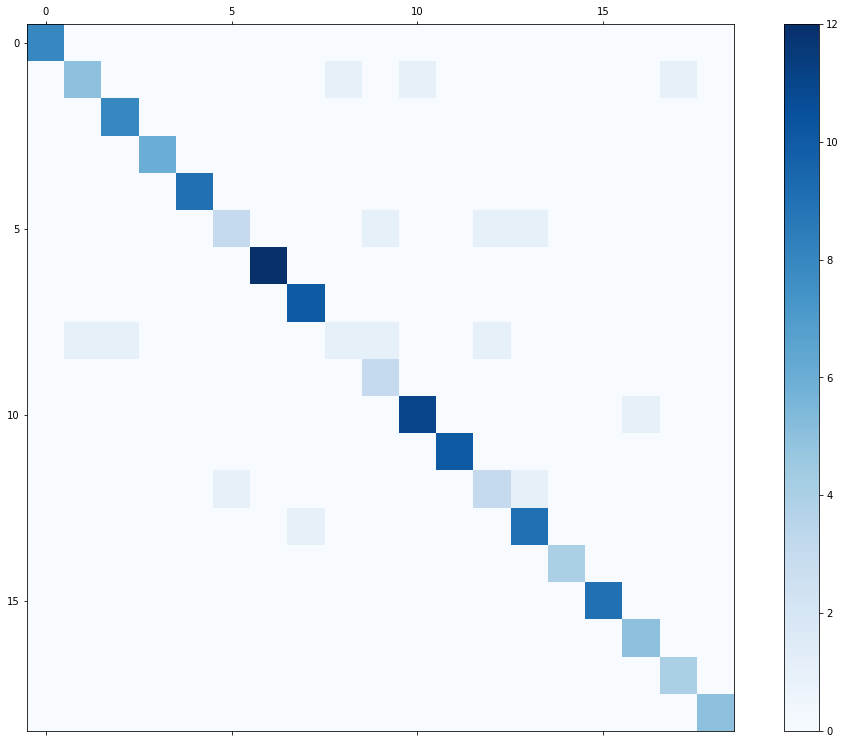

In [88]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=label_val, y_pred=ab)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

**Model training LGB dart:**

In [89]:
import lightgbm as lgb
params={}
params['learning_rate']=0.1
params['boosting_type']='dart' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=15
params['num_class']=19 #no.of unique values in the target class not inclusive of the end value
params['num_leaves'] = 500

d_train=lgb.Dataset(X_train, label_train1)

model10 = lgb.train(params,d_train,100)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 1248, number of used features: 120
[LightGBM] [Info] Start training from score -2.954910
[LightGBM] [Info] Start training from score -2.954910
[LightGBM] [Info] Start training from score -2.954910
[LightGBM] [Info] Start training from score -2.924605
[LightGBM] [Info] Start training from score -2.970414
[LightGBM] [Info] Start training from score -2.924605
[LightGBM] [Info] Start training from score -3.018424
[LightGBM] [Info] Start training from score -2.986163
[LightGBM] [Info] Start training from score -2.909790
[LightGBM] [Info] Start training from score -2.880802
[LightGBM] [Info] Start training from score -3.018424
[LightGBM] [Info] Start training fr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [90]:
import sklearn
label_pred_lgb = model10.predict(X_val, num_iteration = model10.best_iteration)
a = le.inverse_transform([np.argmax(line) for line in label_pred_lgb])
print(classification_report(label_val,a))
sklearn.metrics.accuracy_score(label_val,a)

                              precision    recall  f1-score   support

                 Demonstrasi       1.00      1.00      1.00         8
                   Kerusuhan       1.00      0.62      0.77         8
                   Narkotika       0.89      1.00      0.94         8
           Pelecehan Seksual       1.00      1.00      1.00         6
   Pembakaran Dengan Sengaja       1.00      1.00      1.00         9
                  Pembunuhan       0.33      0.17      0.22         6
                   Penadahan       1.00      1.00      1.00        12
                  Penculikan       0.91      1.00      0.95        10
             Pencurian Biasa       0.50      0.20      0.29         5
  Pencurian Dengan Kekerasan       0.50      1.00      0.67         3
 Pencurian Dengan Pemberatan       0.92      0.92      0.92        12
Pencurian Kendaraan Bermotor       1.00      1.00      1.00        10
          Penganiayaan Berat       0.60      0.60      0.60         5
         Penganiaya

0.8848920863309353

In [91]:
model10.save_model('lgbm_dart_model.txt')

In [92]:
a=pd.DataFrame(label_test_pred_class_lgba, columns = ['Hasil Prediksi'])
b=pd.DataFrame(df_test1.iloc[0:500,:1])
b=b.reset_index(drop=True)
c=pd.concat([a, b], axis=1)
c.to_csv('hasil3.csv')
c.loc[c['Hasil Prediksi'] == c['Category'] , 'Keterangan'] = 'True'
c.loc[c['Hasil Prediksi'] != c['Category'] , 'Keterangan'] = 'False' ; c

,Hasil Prediksi,Category,Keterangan
0,Pencurian Dengan Kekerasan,Perkosaan,False
1,Penganiayaan Berat,Pencurian Biasa,False
2,Pencurian Dengan Kekerasan,Penganiayaan Ringan,False
3,Penganiayaan Berat,Penganiayaan Berat,True
4,Pencurian Dengan Kekerasan,Pencurian Biasa,False
...,...,...,...
495,Pembunuhan,Pembunuhan,True
496,Pencurian Dengan Kekerasan,Kerusuhan,False
497,Pembunuhan,Narkotika,False
498,Penganiayaan Berat,Pencurian Dengan Pemberatan,False


In [93]:
Tr = c[c['Keterangan'] == 'True'].count()
Fa = c[c['Keterangan'] == 'False'].count()
PrTr = (Tr/(Tr+Fa)) * 100
PrFa = (Fa/(Tr+Fa)) * 100
print("Persentase Benar: " ,'\n',PrTr,'\n  \n', "Persentase Salah: \n", PrFa)

Persentase Benar:  
 Hasil Prediksi    24.0
Category          24.0
Keterangan        24.0
dtype: float64 
  
 Persentase Salah: 
 Hasil Prediksi    76.0
Category          76.0
Keterangan        76.0
dtype: float64


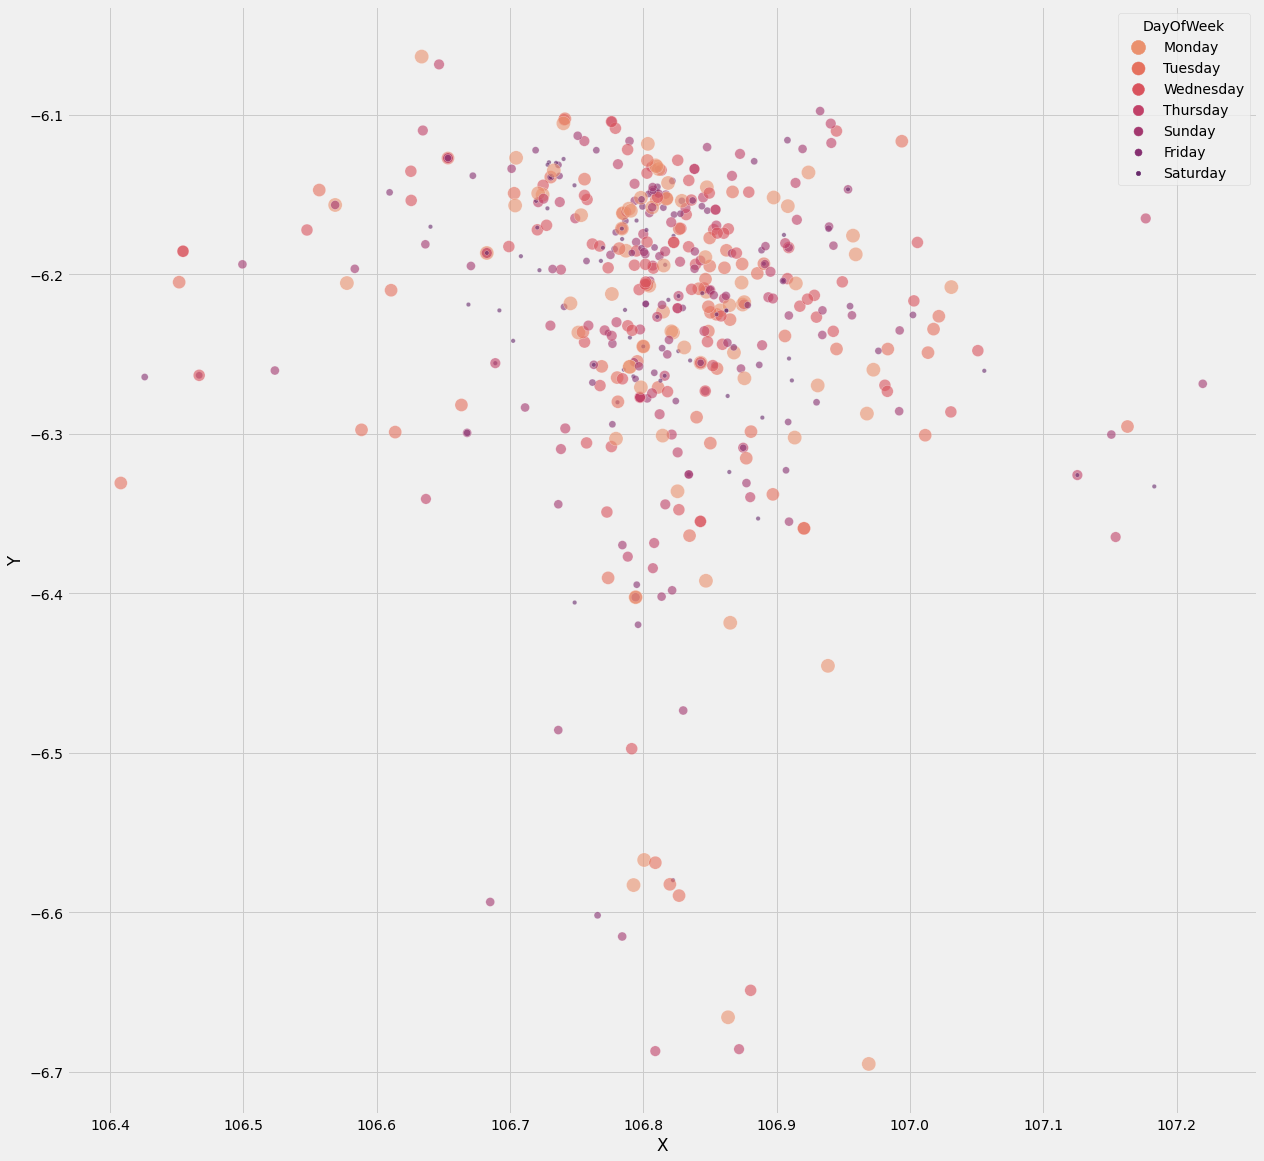

In [94]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(19, 19))
    sns.scatterplot(data=df, x='X', y='Y', alpha=0.6, palette='flare', hue='DayOfWeek',
                    size='DayOfWeek', sizes=(20, 200), markers=True) # 878049 

In [95]:
c1 = df_test1.drop(columns='Category')
c1 = c1.iloc[0:500,:].reset_index(drop=True);c1
c1 = pd.concat([c1,a],axis=1);c1.head()

,DayOfWeek,Dates,Address,PdDistrict,X,Y,Hasil Prediksi
0,Monday,24/01/2022 21:00,Jagakarsa,Jagakarsa,106.825665,-6.336060,Pencurian Dengan Kekerasan
1,Monday,25/10/2021 23:30,Tebet,Tebet,106.847284,-6.210990,Penganiayaan Berat
2,Tuesday,31/05/2022 12:00,Cempaka Putih,Cempaka Putih,106.862368,-6.184973,Pencurian Dengan Kekerasan
3,Wednesday,01/06/2022 00:00,Bekasi Selatan,Bekasi Selatan,106.981248,-6.269581,Penganiayaan Berat
4,Wednesday,25/05/2022 09:00,Pulogadung,Pulogadung,106.909072,-6.183233,Pencurian Dengan Kekerasan


# Testing Process

In [96]:
def test_file_processing(df_t2):
    df_t2['Dates'] =  pd.to_datetime(df_t2['Dates'], infer_datetime_format=True)
    df_t2['year'] = pd.to_datetime(df_t2['Dates']).dt.year
    df_t2['month'] = pd.to_datetime(df_t2['Dates']).dt.month
    df_t2['day'] = pd.to_datetime(df_t2['Dates']).dt.day
    df_t2['hour'] = pd.to_datetime(df_t2['Dates']).dt.hour
    nominal_variables = ['year','month','day','hour', 'DayOfWeek', 'PdDistrict']
    df_t2 = pd.get_dummies(df_t2, columns = nominal_variables, drop_first=True)
    for x in df_t2['Address'].unique():
        df_t2[x] = False
    for x in df_t2['Address'].unique():
        df_t2[x] = df_t2[x].astype(int)
    df_t2.drop(columns=['Dates','Address'], inplace=True)
    
    return df_t2

In [97]:
df_test2=pd.read_csv('test2.csv',sep=';')

In [98]:
df_test2.head()

,DayOfWeek,Dates,PdDistrict,Address,X,Y
0,Monday,06/06/2022 15:00,Jagakarsa,Jagakarsa,106.825665,-6.336060
1,Monday,06/06/2022 15:00,Tebet,Tebet,106.847284,-6.210990
2,Monday,06/06/2022 15:00,Cempaka Putih,Cempaka Putih,106.862368,-6.184973
3,Monday,06/06/2022 15:00,Bekasi Selatan,Bekasi Selatan,106.981248,-6.269581
4,Monday,06/06/2022 15:00,Pulogadung,Pulogadung,106.909072,-6.183233


In [99]:
df_test2

,DayOfWeek,Dates,PdDistrict,Address,X,Y
0,Monday,06/06/2022 15:00,Jagakarsa,Jagakarsa,106.825665,-6.336060
1,Monday,06/06/2022 15:00,Tebet,Tebet,106.847284,-6.210990
2,Monday,06/06/2022 15:00,Cempaka Putih,Cempaka Putih,106.862368,-6.184973
3,Monday,06/06/2022 15:00,Bekasi Selatan,Bekasi Selatan,106.981248,-6.269581
4,Monday,06/06/2022 15:00,Pulogadung,Pulogadung,106.909072,-6.183233
...,...,...,...,...,...,...
253,Monday,06/06/2022 16:00,Tapos,Tapos,106.865188,-6.418527
254,Monday,06/06/2022 16:00,Pulo Gadung,Pulo Gadung,106.891210,-6.193607
255,Monday,06/06/2022 16:00,Cisauk,Cisauk,106.636918,-6.340859
256,Monday,06/06/2022 16:00,Jatiasih,Jatiasih,106.967742,-6.287351


In [100]:
un=pd.to_datetime(df_test2['Dates']).dt.hour.unique()
un1=pd.to_datetime(df_test2['Dates']).dt.year.unique()
un2=df_test2['DayOfWeek'].unique();un2

array(['Monday'], dtype=object)

In [101]:
test_file_processed = test_file_processing(df_test2)

In [102]:
list1 = ['year_2020','year_2021','year_2022','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','day_2','day_3','day_4','day_5','day_6','day_7','day_8','day_9','day_10','day_11','day_12','day_13','day_14','day_15','day_16','day_17','day_18','day_19','day_20','day_21','day_22','day_23','day_24','day_25','day_26','day_27','day_28','day_29','day_30','day_31','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23', 'DayOfWeek_Monday','DayOfWeek_Saturday','DayOfWeek_Sunday','DayOfWeek_Thursday','DayOfWeek_Tuesday','DayOfWeek_Wednesday']
uniq = []
for x in list1:
    if x not in test_file_processed.columns.to_list():
        uniq.append(x)

In [103]:
test_file_processed[uniq]=0

In [104]:
for i in range (len(un2)):
    idx=test_file_processed.columns.get_loc(str('DayOfWeek_' + str(un2[i])))
    a11 = df_test2.index[df_test2['DayOfWeek'] == un2[i]].tolist()
    test_file_processed.iloc[a11[0]:a11[-1]+1,idx:idx+1] = 1

In [105]:
for i in range (len(pd.to_datetime(df_test2['Dates']).dt.year.unique())):
    idx=test_file_processed.columns.get_loc(str('year_' + str(un1[i])))
    a11 = df_test2.index[pd.to_datetime(df_test2['Dates']).dt.year == un1[i]].tolist()
    test_file_processed.iloc[a11[0]:a11[-1]+1,idx:idx+1] = 1

In [106]:
for i in range (len(pd.to_datetime(df_test2['Dates']).dt.hour.unique())):
    idx=test_file_processed.columns.get_loc(str('hour_' + str(un[i])))
    a11 = df_test2.index[pd.to_datetime(df_test2['Dates']).dt.hour == un[i]].tolist()
    test_file_processed.iloc[a11[0]:a11[-1]+1,idx:idx+1] = 1

In [107]:
test_file_processed.head()

,X,Y,hour_16,PdDistrict_Beji,PdDistrict_Bekasi,PdDistrict_Bekasi Barat,PdDistrict_Bekasi Selatan,PdDistrict_Bekasi Timur,PdDistrict_Bekasi Utara,PdDistrict_Benda,...,hour_20,hour_21,hour_22,hour_23,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,106.825665,-6.336060,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,106.847284,-6.210990,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,106.862368,-6.184973,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,106.981248,-6.269581,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,106.909072,-6.183233,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [108]:
test_file_processed.shape

(258, 332)

In [109]:
label_test_pred_prob = cat_model_class.predict_proba(test_file_processed)

In [110]:
label_test_pred_class = cat_model_class.predict(test_file_processed)

The following line should print the class predicted for instances in testing file:

In [111]:
a=pd.DataFrame(label_test_pred_class, columns = ['Hasil Prediksi'])
a.to_csv('COBA1.1.csv');a

,Hasil Prediksi
0,Pencurian Dengan Kekerasan
1,Pencurian Dengan Kekerasan
2,Pencurian Dengan Kekerasan
3,Pencurian Dengan Kekerasan
4,Pencurian Dengan Kekerasan
...,...
253,Pencurian Dengan Kekerasan
254,Pencurian Dengan Kekerasan
255,Pencurian Dengan Kekerasan
256,Pencurian Dengan Kekerasan


**Model training LGB GBDT:**

In [112]:
label_test_pred_class_lgb = model.predict(test_file_processed, num_iteration = model.best_iteration)
label_test_pred_class_lgba = le.inverse_transform([np.argmax(line) for line in label_test_pred_class_lgb])

In [113]:
a=pd.DataFrame(label_test_pred_class_lgba, columns = ['Hasil Prediksi'])
a.to_csv('COBA2.1.csv');a

,Hasil Prediksi
0,Pencurian Dengan Kekerasan
1,Pencurian Dengan Kekerasan
2,Pencurian Dengan Kekerasan
3,Pembunuhan
4,Pencurian Dengan Kekerasan
...,...
253,Pembunuhan
254,Pembunuhan
255,Pembunuhan
256,Pembunuhan


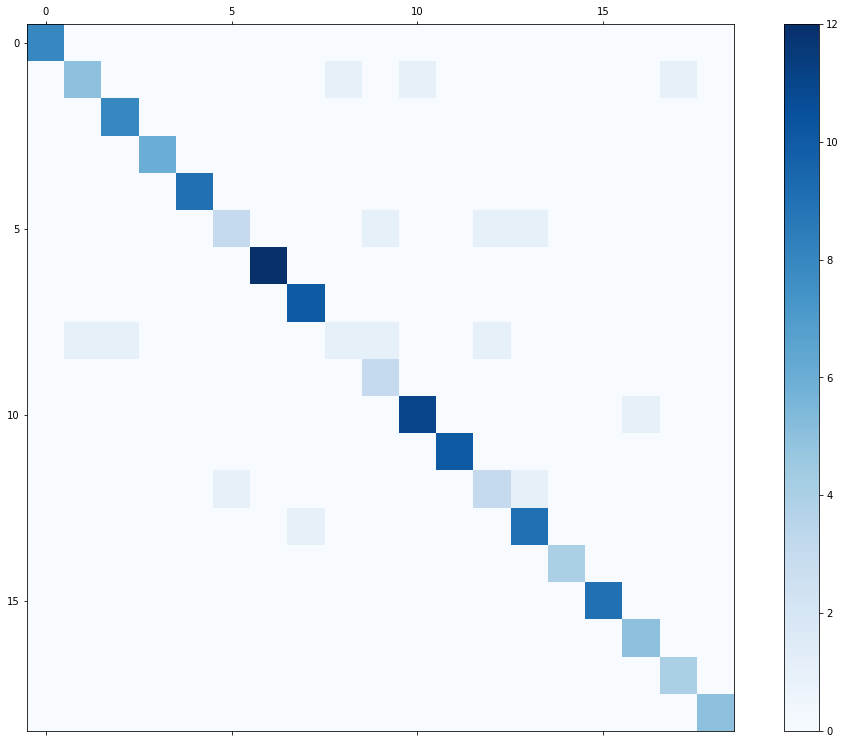

In [114]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=label_val, y_pred=ab)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

**Model training LGB dart:**

In [115]:
a=pd.DataFrame(label_test_pred_class_lgba, columns = ['Hasil Prediksi'])
a.to_csv('COBA3.1.csv');a

,Hasil Prediksi
0,Pencurian Dengan Kekerasan
1,Pencurian Dengan Kekerasan
2,Pencurian Dengan Kekerasan
3,Pembunuhan
4,Pencurian Dengan Kekerasan
...,...
253,Pembunuhan
254,Pembunuhan
255,Pembunuhan
256,Pembunuhan


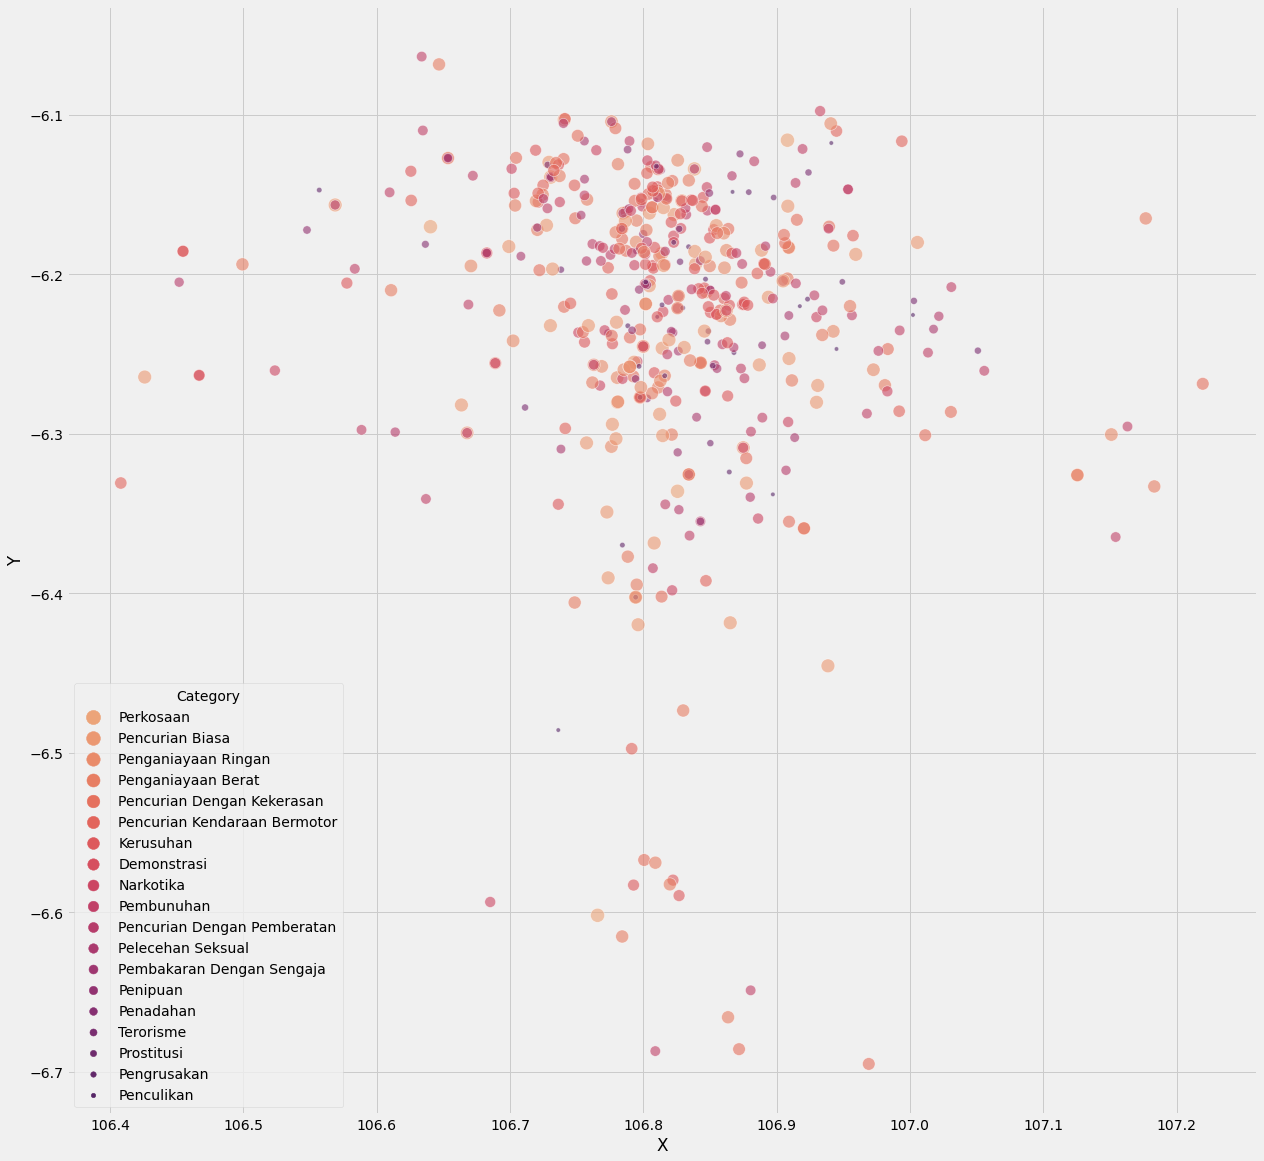

In [116]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(19, 19))
    sns.scatterplot(data=df, x='X', y='Y', alpha=0.6, palette='flare', hue='Category',
                    size='Category', sizes=(20, 200), markers=True) # 878049 

In [117]:
c1 = df_test1.drop(columns='Category')
c1 = c1.iloc[0:500,:].reset_index(drop=True);c1
c1 = pd.concat([c1,a],axis=1);c1.head()

,DayOfWeek,Dates,Address,PdDistrict,X,Y,Hasil Prediksi
0,Monday,24/01/2022 21:00,Jagakarsa,Jagakarsa,106.825665,-6.336060,Pencurian Dengan Kekerasan
1,Monday,25/10/2021 23:30,Tebet,Tebet,106.847284,-6.210990,Pencurian Dengan Kekerasan
2,Tuesday,31/05/2022 12:00,Cempaka Putih,Cempaka Putih,106.862368,-6.184973,Pencurian Dengan Kekerasan
3,Wednesday,01/06/2022 00:00,Bekasi Selatan,Bekasi Selatan,106.981248,-6.269581,Pembunuhan
4,Wednesday,25/05/2022 09:00,Pulogadung,Pulogadung,106.909072,-6.183233,Pencurian Dengan Kekerasan
